In [ ]:
# koNLPy, sentence-transformers 실행 시 초기 설치
!pip install sentence-transformers
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 99.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 44.2 MB/s eta 0:00:00


# 1. 데이터 구조 확인

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1-1. `books`

In [ ]:
books = pd.read_csv("/content/drive/MyDrive/Epoch/Mini project/books.csv")

<ipython-input-4-a4514f86f2f0>:1: DtypeWarning: Columns (7,17) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("/content/drive/MyDrive/Epoch/Mini project/books.csv")


In [ ]:
books.head()

,SEQ_NO,ISBN_THIRTEEN_NO,VLM_NM,TITLE_NM,AUTHR_NM,PUBLISHER_NM,PBLICTE_DE,ADTION_SMBL_NM,PRC_VALUE,IMAGE_URL,BOOK_INTRCN_CN,KDC_NM,TITLE_SBST_NM,AUTHR_SBST_NM,TWO_PBLICTE_DE,INTNT_BOOKST_BOOK_EXST_AT,PORTAL_SITE_BOOK_EXST_AT,ISBN_NO
0,6329484,2090000107555,NaN,2022 인생일력,민음사 편집부 (지은이),민음사,NaN,NaN,18000.0,https://image.aladin.co.kr/product/28228/16/co...,2018년부터 여러분과 함께해 온 인생일력. 민음사의 동양 고전 60여 권을 한 권...,NaN,NaN,NaN,2021-12-08,NaN,NaN,NaN
1,6329485,9791165217501,NaN,2022 조구만 일력,조구만 스튜디오 (지은이),더퀘스트,NaN,NaN,28000.0,https://image.aladin.co.kr/product/28244/9/cov...,"귀여운 그림체, 그러나 마냥 귀엽지만은 않은 메시지로 사랑받고 있는 조구만 스튜디오...",NaN,NaN,NaN,2021-11-25,NaN,NaN,NaN
2,6329486,9788990564931,NaN,이상기후 재난과 중점 대응 방향 :,국립재난안전연구원 [편],국립재난안전연구원,NaN,NaN,NaN,NaN,NaN,NaN,이상기후재난과중점대응방향,국립재난안전연구원편,NaN,Y,Y,NaN
3,6329487,9791197488801,NaN,경주 구황동 원지 종합정비계획,[연구기관]: 신라문화유산연구원,신라문화유산연구원,NaN,13900.0,NaN,NaN,NaN,NaN,경주구황동원지종합정비계획,연구기관신라문화유산연구원,NaN,Y,Y,NaN
4,6329488,9791166118869,NaN,도우미 여우 센코 씨 7 - S코믹스,"리무코로 (지은이), 나민형 (옮긴이)",㈜소미미디어,NaN,7830.0,5000.0,https://image.aladin.co.kr/product/27257/59/co...,"나카노를 흠모하는 후배이자 너구리 소녀 후쿠다 씨, 마침내 센코 씨와 맞닥뜨리다. ...",NaN,도우미여우센코씨7s코믹스,"리무코로지은이,나민형옮긴이",2021-06-04,Y,Y,NaN


In [ ]:
print(books.iloc[:,10])

0         2018년부터 여러분과 함께해 온 인생일력. 민음사의 동양 고전 60여 권을 한 권...
1         귀여운 그림체, 그러나 마냥 귀엽지만은 않은 메시지로 사랑받고 있는 조구만 스튜디오...
2                                                       NaN
3                                                       NaN
4         나카노를 흠모하는 후배이자 너구리 소녀 후쿠다 씨, 마침내 센코 씨와 맞닥뜨리다. ...
                                ...                        
102814    직도는 4,500여 년 전 요ㆍ순 임금시대로부터 내려와서, 3,000여 년 전 공자...
102815    중학교 3학년 학생이 영어로 쓴 그리스 신화를 통해 배우는 과학 이야기. 그리스 신...
102816    일상이 무너지지 않으려면 평소에 조금씩 꾸준히 문제를 직면하는 연습이 필요하다. 그...
102817    심리학은 인간이 행복하게 사는 데 필요한 정보와 기술을 제공해준다. 그래서 심리학은...
102818    시간은 없고 어떻게 공부할지 걱정된다? 『5일 만에 끝내는 미적분학 1』이 있으니 ...
Name: BOOK_INTRCN_CN, Length: 102819, dtype: object


In [ ]:
print(len(books))

102819


In [ ]:
print(books.iloc[:,10].isnull().sum())

51685


## 1-2. `library_books`

In [ ]:
library_books = pd.read_csv("/content/drive/MyDrive/Epoch/Mini project/library_books.csv")

<ipython-input-9-aedd384591b9>:1: DtypeWarning: Columns (0,2,3,4,8,9,11,12,13,14,15,18,19,20,21,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  library_books = pd.read_csv("/content/drive/MyDrive/Epoch/Mini project/library_books.csv")


In [ ]:
library_books.head()

,CTRL_NO,AUTHR_NM,VLM_NM,PBLICTE_YEAR,CL_SMBL_NO,BOOK_SMBL_NO,TITLE_NM,LBRRY_CD,ISBN_THIRTEEN_NO,REPRSNT_BOOK_AT,...,REGIST_DE,ISBN_THIRTEEN_ORGT_NO,MASTR_LBRRY_CD,VLM_EXST_AT,SET_ISBN_CHG_AT,VLM_ORGT_NM,TITLE_SBST_NM,KDC_NM,BOOK_CL_CD,BOOK_LC_CD
0,424851234,"차홍규,김성진 엮음",NaN,2018,609.2,차95서,(알수록 다시 보는) 서양 미술 100:그림이 알려주지 않는 그림 속 숨겨진 이야기,1501,9788965781325.0,Y,...,2021-10-17 00:00:00.0,9.788966e+12,1500,N,N,NaN,알수록다시보는서양미술100그림이알려주지않는그림속숨겨진이야기,609.2,NaN,NaN
1,424851258,데브라 N. 맨커프 지음 ;안희정 옮김,NaN,2021,609,맨874처,처음 보는 비밀 미술관 :모든 그림에는 시크릿 코드가 있다,1501,9791155813386.0,Y,...,2021-10-17 00:00:00.0,9.791156e+12,1500,N,N,NaN,처음보는비밀미술관모든그림에는시크릿코드가있다,609.0,NaN,NaN
2,424851281,윤희솔 지음,NaN,2021,375.4802,윤97하,하루 1 질문 초등 글쓰기의 기적,1501,9788925588698.0,Y,...,2021-10-17 00:00:00.0,9.788926e+12,1500,N,N,NaN,하루1질문초등글쓰기의기적,375.4802,NaN,NaN
3,424851307,"박형주,김지연 지음",NaN,2020,029.8,박94그,(공부머리 만드는)그림책 놀이 일 년 열두 달:호기심을 북돋는 그림책 대화에서 읽기...,1501,9788988964477.0,Y,...,2021-10-17 00:00:00.0,9.788989e+12,1500,N,N,NaN,공부머리만드는그림책놀이일년열두달호기심을북돋는그림책대화에서읽기능력키우는그림책놀이까지,29.8,NaN,NaN
4,424851367,김수민 지음,NaN,2021,818,김56그,그렇다면 나를 응원할 수밖에 :멋대로지만 제대로 사는 중입니다 :김수민 에세이,1501,9791197037191.0,Y,...,2021-10-17 00:00:00.0,9.791197e+12,1500,N,N,NaN,그렇다면나를응원할수밖에멋대로지만제대로사는중입니다김수민에세이,818.0,NaN,NaN


## 1-3. `library`

In [ ]:
library = pd.read_csv("/content/drive/MyDrive/Epoch/Mini project/library.csv")

In [ ]:
library.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333 entries, 0 to 1332
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LBRRY_CD            1333 non-null   int64  
 1   LBRRY_NM            1333 non-null   object 
 2   LBRRY_ADDR          1333 non-null   object 
 3   LBRRY_LA            1333 non-null   float64
 4   LBRRY_LO            1333 non-null   float64
 5   ONE_AREA_NM         1333 non-null   object 
 6   TWO_AREA_NM         1333 non-null   object 
 7   LBRRY_NO            1323 non-null   float64
 8   API_LBRRY_NO        1330 non-null   float64
 9   TEL_NO              1316 non-null   object 
 10  FAX_NO              1278 non-null   object 
 11  HMPG_VALUE          1316 non-null   object 
 12  OPNNG_TIME          1279 non-null   object 
 13  CLOSEDON_DC         1281 non-null   object 
 14  LBRRY_TY_CD         1333 non-null   int64  
 15  LBRRY_TY_NM         1333 non-null   object 
 16  FOND_M

In [ ]:
library.head()

,LBRRY_CD,LBRRY_NM,LBRRY_ADDR,LBRRY_LA,LBRRY_LO,ONE_AREA_NM,TWO_AREA_NM,LBRRY_NO,API_LBRRY_NO,TEL_NO,...,LBRRY_NCM_NM,ETC_LBRRY_CD,AREA_CD,ETC_LBRRY_ADDR,ETC_LBRRY_NM,TWO_ETC_LBRRY_NM,REPRSNT_AT,ONE_AREA_CD,TWO_AREA_CD,WETHR_AREA_CD
0,1500,포천시립중앙도서관,경기도 포천시 신북면 중앙로207번길 26,37.905303,127.206376,경기도,포천시,141333.0,141333.0,031-538-3911,...,중앙,MA,7,경기도 포천시 신북면 가채리 770,포천시립중앙도서관,포천시립중앙도서관,Y,경기도,포천시,동두천
1,1501,포천시립소흘도서관,경기도 포천시 소흘읍 송우로 101-29,37.829605,127.137534,경기도,포천시,141172.0,141172.0,031-538-3952,...,소흘,MB,7,경기도 포천시 소흘읍 송우리 728-7,포천시립소흘도서관,소흘도서관,N,경기도,포천시,동두천
2,1502,포천시립일동도서관,경기도 포천시 일동면 화동로 1021,37.954936,127.315456,경기도,포천시,141094.0,141094.0,031-538-3932,...,일동,MC,7,경기도 포천시 일동면 기산리 284-3,포천시립일동도서관,일동도서관,N,경기도,포천시,동두천
3,1503,포천시립영중꿈나무도서관,경기도 포천시 영중면 양문로 151,38.005629,127.245302,경기도,포천시,141102.0,141102.0,031-538-3945,...,영중,MD,7,경기도 포천시 영중면 양문리 833-2,포천시립영중어린이도서관,영중꿈나무도서관,N,경기도,포천시,동두천
4,1504,포천시립영북도서관,경기도 포천시 영북면 운천안길 3,38.087682,127.274170,경기도,포천시,141520.0,141520.0,031-538-3972,...,영북,ME,7,경기도 포천시 영북면 운천리 540-2,포천시립영북도서관,영북도서관,N,경기도,포천시,동두천


In [ ]:
print(library.iloc[:,1])

0          포천시립중앙도서관
1          포천시립소흘도서관
2          포천시립일동도서관
3       포천시립영중꿈나무도서관
4         포천시립영북도서관 
            ...     
1328          대평동도서관
1329          소담동도서관
1330          다정동도서관
1331          해밀동도서관
1332          반곡동도서관
Name: LBRRY_NM, Length: 1333, dtype: object


## 1-4. `loan_information`

In [ ]:
loan_information = pd.read_csv("/content/drive/MyDrive/Epoch/Mini project/loan_information.csv")

<ipython-input-16-b7ce979aceaf>:1: DtypeWarning: Columns (11,20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_information = pd.read_csv("/content/drive/MyDrive/Epoch/Mini project/loan_information.csv")


In [ ]:
loan_information.head()

,SEQ_NO,RANK_CO,INPT_DE,ISBN_THIRTEEN_NO,BOOK_TITLE_NM,AUTHR_NM,BOOK_INTRCN_CN,PUBLISHER_NM,PBLICTE_DE,BOOK_IMAGE_NM,...,LON_CO,ANALS_PD_CD,ANALS_PD_CD_NM,ANALS_TY_CD,ANALS_TY_CD_NM,AGE_FLAG_NM,AREA_NM,SEXDSTN_FLAG_NM,VLM_NM,ANALS_LON_TOT_CO
0,198841476,629,2020-03-15,9.788910e+12,멋쟁이 낸시는 실수투성이 미용사,제인 오코너 글 ;김영선 옮김,국민서관 그림동화 시리즈 160권. 주인공 낸시가 학급 기념사진을 찍기 전날 혼자 ...,국민서관,2014,https://bookthumb-phinf.pstatic.net/cover/079/...,...,1,p1,7일,3,지역별,NaN,경남,NaN,160,6811
1,198841475,629,2020-03-15,9.788910e+12,"지글아, 어디 숨었니? :재미난 플랩북",지은이: 로렌 차일드 ;옮긴이: 문상수,찰리와 롤라 시리즈. &lt;난 토마토 절대 안 먹어&gt;로 오랫동안 독자들의 많...,국민서관,2013,http://image.aladin.co.kr/product/3269/40/cove...,...,1,p1,7일,3,지역별,NaN,경남,NaN,NaN,6811
2,198841473,629,2020-03-15,9.788910e+12,내가 책이라면,쥬제 죠르즈 레트리아 글 ;임은숙 옮김,"2013년 제2회 CJ그림책애니메이션 선정작. 스페인 바르셀로나 시 수업 상, 브라...",국민서관,2012,http://image.aladin.co.kr/product/2125/6/cover...,...,1,p1,7일,3,지역별,NaN,경남,NaN,144,6811
3,198841474,629,2020-03-15,9.788910e+12,멋쟁이 낸시의 별자리 여행,제인 오코너 글 ;김영선 옮김,국민서관 그림동화 시리즈 148권. 주인공 낸시가 별자리 감상을 준비하는 하루 동안...,국민서관,2013,https://bookthumb-phinf.pstatic.net/cover/072/...,...,1,p1,7일,3,지역별,NaN,경남,NaN,148,6811
4,198841472,629,2020-03-15,9.788910e+12,멋쟁이 낸시의 학교생활 100일,제인 오코너 글 ;김영선 옮김,국민서관 그림동화 시리즈 136권. 학교생활 100일을 기념해 뭔가 상상력 넘치는 ...,국민서관,2012,http://image.aladin.co.kr/product/1672/14/cove...,...,1,p1,7일,3,지역별,NaN,경남,NaN,136,6811


In [ ]:
loan_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498532 entries, 0 to 1498531
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   SEQ_NO             1498532 non-null  int64  
 1   RANK_CO            1498532 non-null  int64  
 2   INPT_DE            1498532 non-null  object 
 3   ISBN_THIRTEEN_NO   1498532 non-null  float64
 4   BOOK_TITLE_NM      1498476 non-null  object 
 5   AUTHR_NM           1497447 non-null  object 
 6   BOOK_INTRCN_CN     1438196 non-null  object 
 7   PUBLISHER_NM       1481547 non-null  object 
 8   PBLICTE_DE         1494707 non-null  object 
 9   BOOK_IMAGE_NM      1459868 non-null  object 
 10  BOOK_MASTR_SEQ_NO  1498532 non-null  int64  
 11  KDC_NM             1305925 non-null  object 
 12  LON_CO             1498532 non-null  int64  
 13  ANALS_PD_CD        1498532 non-null  object 
 14  ANALS_PD_CD_NM     1498532 non-null  object 
 15  ANALS_TY_CD        1498532 non-n

In [ ]:
print(len(loan_information))

1498532


순위수가 161위까지만 존재 -> 사용하기에 부적절할 수 있음. 대출 수를 카운트해서 비교하는 것이 더 직관적일 것.

In [ ]:
loan_information['RANK_CO'].value_counts(ascending=True)

,count
RANK_CO,
1000,33
998,59
999,71
993,109
997,143
...,...
78,3632
477,3669
287,3802


서적 정보 결측치

In [ ]:
print(loan_information.iloc[:,6].isnull().sum()) # BOOK_INTRCN_CN (서적 정보rint(loan_information.iloc[:,6].isnull().sum()) # BOOK_INTRCN_CN (서적 정보))

60336


# 2. 데이터 정제

## 2-1. 데이터 프레임 확인

In [ ]:
# ISBN 불러오기
# ISBN -> str 타입 변환
# INPT_DE(입력일시) -> date 타입 변환

loan_information = pd.read_csv("/content/drive/MyDrive/Epoch/Mini project/loan_information.csv", dtype={"ISBN_THIRTEEN_NO": str})
loan_information["INPT_DE"] = pd.to_datetime(loan_information["INPT_DE"], errors="coerce")

<ipython-input-21-c453affb135b>:5: DtypeWarning: Columns (11,20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_information = pd.read_csv("/content/drive/MyDrive/Epoch/Mini project/loan_information.csv", dtype={"ISBN_THIRTEEN_NO": str})


In [ ]:
df_origin = loan_information.copy()

In [ ]:
df_origin.head()

,SEQ_NO,RANK_CO,INPT_DE,ISBN_THIRTEEN_NO,BOOK_TITLE_NM,AUTHR_NM,BOOK_INTRCN_CN,PUBLISHER_NM,PBLICTE_DE,BOOK_IMAGE_NM,...,LON_CO,ANALS_PD_CD,ANALS_PD_CD_NM,ANALS_TY_CD,ANALS_TY_CD_NM,AGE_FLAG_NM,AREA_NM,SEXDSTN_FLAG_NM,VLM_NM,ANALS_LON_TOT_CO
0,198841476,629,2020-03-15,9788910000000.0,멋쟁이 낸시는 실수투성이 미용사,제인 오코너 글 ;김영선 옮김,국민서관 그림동화 시리즈 160권. 주인공 낸시가 학급 기념사진을 찍기 전날 혼자 ...,국민서관,2014,https://bookthumb-phinf.pstatic.net/cover/079/...,...,1,p1,7일,3,지역별,NaN,경남,NaN,160,6811
1,198841475,629,2020-03-15,9788910000000.0,"지글아, 어디 숨었니? :재미난 플랩북",지은이: 로렌 차일드 ;옮긴이: 문상수,찰리와 롤라 시리즈. &lt;난 토마토 절대 안 먹어&gt;로 오랫동안 독자들의 많...,국민서관,2013,http://image.aladin.co.kr/product/3269/40/cove...,...,1,p1,7일,3,지역별,NaN,경남,NaN,NaN,6811
2,198841473,629,2020-03-15,9788910000000.0,내가 책이라면,쥬제 죠르즈 레트리아 글 ;임은숙 옮김,"2013년 제2회 CJ그림책애니메이션 선정작. 스페인 바르셀로나 시 수업 상, 브라...",국민서관,2012,http://image.aladin.co.kr/product/2125/6/cover...,...,1,p1,7일,3,지역별,NaN,경남,NaN,144,6811
3,198841474,629,2020-03-15,9788910000000.0,멋쟁이 낸시의 별자리 여행,제인 오코너 글 ;김영선 옮김,국민서관 그림동화 시리즈 148권. 주인공 낸시가 별자리 감상을 준비하는 하루 동안...,국민서관,2013,https://bookthumb-phinf.pstatic.net/cover/072/...,...,1,p1,7일,3,지역별,NaN,경남,NaN,148,6811
4,198841472,629,2020-03-15,9788910000000.0,멋쟁이 낸시의 학교생활 100일,제인 오코너 글 ;김영선 옮김,국민서관 그림동화 시리즈 136권. 학교생활 100일을 기념해 뭔가 상상력 넘치는 ...,국민서관,2012,http://image.aladin.co.kr/product/1672/14/cove...,...,1,p1,7일,3,지역별,NaN,경남,NaN,136,6811


In [ ]:
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498532 entries, 0 to 1498531
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   SEQ_NO             1498532 non-null  int64         
 1   RANK_CO            1498532 non-null  int64         
 2   INPT_DE            1498532 non-null  datetime64[ns]
 3   ISBN_THIRTEEN_NO   1498532 non-null  object        
 4   BOOK_TITLE_NM      1498476 non-null  object        
 5   AUTHR_NM           1497447 non-null  object        
 6   BOOK_INTRCN_CN     1438196 non-null  object        
 7   PUBLISHER_NM       1481547 non-null  object        
 8   PBLICTE_DE         1494707 non-null  object        
 9   BOOK_IMAGE_NM      1459868 non-null  object        
 10  BOOK_MASTR_SEQ_NO  1498532 non-null  int64         
 11  KDC_NM             1305925 non-null  object        
 12  LON_CO             1498532 non-null  int64         
 13  ANALS_PD_CD        1498532 

In [ ]:
# DataFrame에서 각 컬럼의 고유값 출력
for col in loan_information.columns:
    unique_vals = loan_information[col].dropna().unique()
    print(f"Column: {col}")
    print(f"   - 고유값 개수: {len(unique_vals)}")
    print(f"   - 샘플 값: {unique_vals[:5]}")
    print("-" * 50)

Column: SEQ_NO
   - 고유값 개수: 1498532
   - 샘플 값: [198841476 198841475 198841473 198841474 198841472]
--------------------------------------------------
Column: RANK_CO
   - 고유값 개수: 1000
   - 샘플 값: [629  98 995 914 575]
--------------------------------------------------
Column: INPT_DE
   - 고유값 개수: 8
   - 샘플 값: ['2020-03-15' '2020-06-15' '2020-09-15' '2020-12-15' '2021-03-16']
--------------------------------------------------
Column: ISBN_THIRTEEN_NO
   - 고유값 개수: 33927
   - 샘플 값: [9.78891e+12 9.78897e+12 9.78893e+12 9.78896e+12 9.78895e+12]
--------------------------------------------------
Column: BOOK_TITLE_NM
   - 고유값 개수: 55629
   - 샘플 값: ['멋쟁이 낸시는 실수투성이 미용사 ' '지글아, 어디 숨었니? :재미난 플랩북 ' '내가 책이라면 '
 '멋쟁이 낸시의 별자리 여행 ' '멋쟁이 낸시의 학교생활 100일 ']
--------------------------------------------------
Column: AUTHR_NM
   - 고유값 개수: 43774
   - 샘플 값: ['제인 오코너 글 ;김영선 옮김' '지은이: 로렌 차일드 ;옮긴이: 문상수' '쥬제 죠르즈 레트리아 글 ;임은숙 옮김'
 '알프레도 고메스 세르다 글 ;유혜경 옮김' '김윤정 글·그림']
-------------------------------------------------

In [ ]:
df_origin["ANALS_TY_CD_NM"].value_counts()

,count
ANALS_TY_CD_NM,
연령 및 성별,861542
지역별,396990
연령별,216000
전체,24000


In [ ]:
df_origin["ANALS_PD_CD_NM"].value_counts()

,count
ANALS_PD_CD_NM,
90일,502000
30일,501000
7일,495532


In [ ]:
df_origin["LON_CO"].value_counts()

,count
LON_CO,
3,88122
2,74775
4,71825
5,56601
1,51525
...,...
2940,1
2956,1
2966,1


"2021-12-15" 기준으로 테스트 후, 정상적이면 행/열 전환 후 모든 날짜 변수에 대해 반영되도록 개선

In [ ]:
df_origin["INPT_DE"].value_counts()

,count
INPT_DE,
2021-12-15,189000
2021-09-15,189000
2021-06-15,189000
2021-03-16,189000
2020-09-15,188127
2020-12-15,187000
2020-06-15,186000
2020-03-15,181405


지역별 대출 건수 시각화

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

loan_information["INPT_DE"] = pd.to_datetime(loan_information["INPT_DE"], errors="coerce")

# "30일" 분석 기간만 필터링 (공백 제거 포함)
loan_30d = loan_information[loan_information["ANALS_PD_CD_NM"].str.strip() == "30일"].copy()

loan_30d.head()

,SEQ_NO,RANK_CO,INPT_DE,ISBN_THIRTEEN_NO,BOOK_TITLE_NM,AUTHR_NM,BOOK_INTRCN_CN,PUBLISHER_NM,PBLICTE_DE,BOOK_IMAGE_NM,...,LON_CO,ANALS_PD_CD,ANALS_PD_CD_NM,ANALS_TY_CD,ANALS_TY_CD_NM,AGE_FLAG_NM,AREA_NM,SEXDSTN_FLAG_NM,VLM_NM,ANALS_LON_TOT_CO
10,198932024,995,2020-03-15,9788930000000.0,쿠키런 빅스타 과학 상식,"조주희 (지은이), 이태영 (그림), 정효해 (감수)",쿠키런 펀펀 상식 시리즈 18권. 초등 저학년부터 고학년까지 두루 읽을 수 있다. ...,서울문화사,2017,http://image.aladin.co.kr/product/11187/11/cov...,...,14,p2,30일,5,연령 및 성별,30대,NaN,여성,18,230440
11,198932023,995,2020-03-15,9788930000000.0,부동산 소액 투자의 정석 :경제가 흔들려도 변하지 않는 자의 기술,김원철 지음,《부동산 투자의 정석》의 김원철 저자의 최신작. 부동산 시장은 늘 불황과 호황을 반...,RHK(알에이치코리아),2019,https://image.aladin.co.kr/product/21431/46/co...,...,14,p2,30일,5,연령 및 성별,30대,NaN,여성,NaN,230440
12,198925024,914,2020-03-15,9788960000000.0,용선생 만화 한국사:,"글: 정상민,주성윤",용선생 만화 한국사 12권. 1945년 8.15 광복으로부터 현재까지가 배경이다. ...,사회평론,2016-2017,https://image.aladin.co.kr/product/12532/69/co...,...,12,p2,30일,5,연령 및 성별,초등(8~13),NaN,남성,12,149575
13,198925023,914,2020-03-15,9788960000000.0,용선생의 시끌벅적 한국사,그림: 이우일,서울대 대학원의 젊은 역사학자들과 학계 각 시대 각 분야의 권위자들이 수차례 글과 ...,사회평론,2012,http://image.aladin.co.kr/product/1647/69/cove...,...,12,p2,30일,5,연령 및 성별,초등(8~13),NaN,남성,8,149575
14,198925022,914,2020-03-15,9788960000000.0,용선생의 시끌벅적 한국사,그림: 이우일,서울대 대학원의 젊은 역사학자들과 학계 각 시대 각 분야의 권위자들이 수차례 글과 ...,사회평론,2012,http://image.aladin.co.kr/product/1647/68/cove...,...,12,p2,30일,5,연령 및 성별,초등(8~13),NaN,남성,7,149575


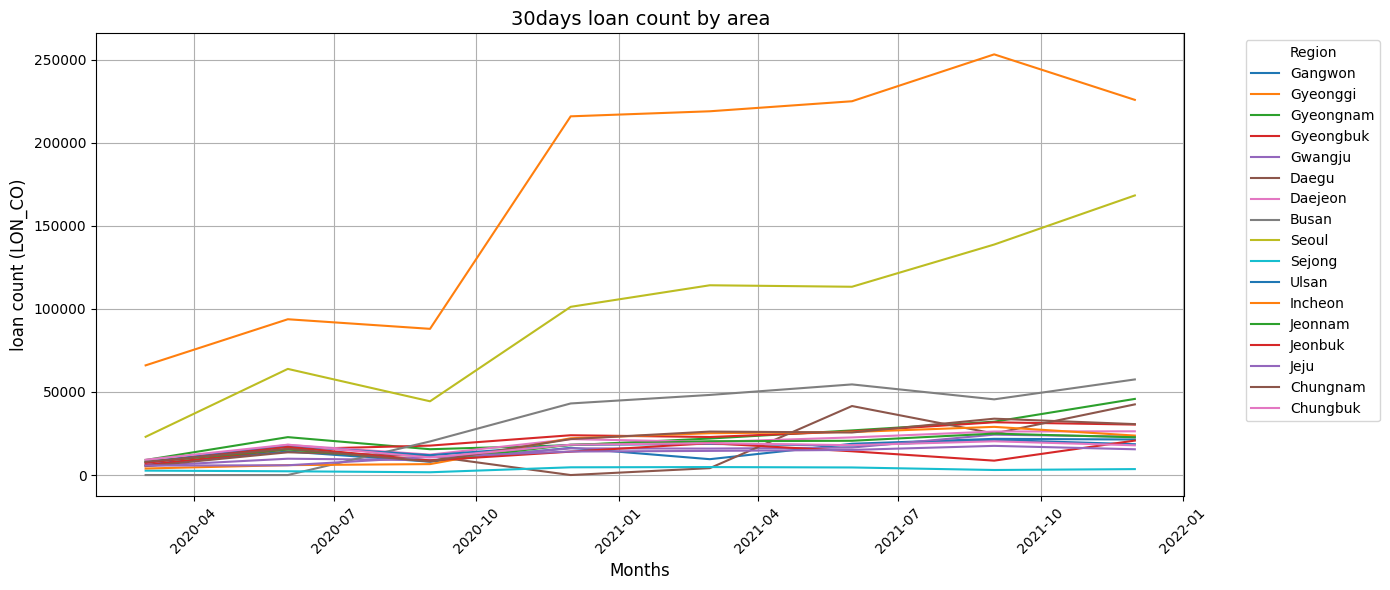

In [ ]:
# 월 기준 + 지역별로 그룹화하여 대출 건수 합계 (LON_CO)
loan_30d["Month"] = loan_30d["INPT_DE"].dt.to_period("M")
loan_by_area_month = loan_30d.groupby(["Month", "AREA_NM"])["LON_CO"].sum().unstack(fill_value=0)

area_name_map = {
    "서울": "Seoul",
    "경기": "Gyeonggi",
    "부산": "Busan",
    "인천": "Incheon",
    "대구": "Daegu",
    "광주": "Gwangju",
    "대전": "Daejeon",
    "세종": "Sejong",
    "울산": "Ulsan",
    "강원": "Gangwon",
    "충북": "Chungbuk",
    "충남": "Chungnam",
    "전북": "Jeonbuk",
    "전남": "Jeonnam",
    "경북": "Gyeongbuk",
    "경남": "Gyeongnam",
    "제주": "Jeju"
}


loan_by_area_month.rename(columns=area_name_map, inplace=True)

# 시각화
plt.figure(figsize=(14, 6))
for area in loan_by_area_month.columns:
    plt.plot(loan_by_area_month.index.to_timestamp(), loan_by_area_month[area], label=area)

plt.title("30days loan count by area", fontsize=14)
plt.xlabel("Months", fontsize=12)
plt.ylabel("loan count (LON_CO)", fontsize=12)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2-2. 데이터 정제

In [ ]:
# 필요한 변수만 1차 슬라이싱

# 1. [BOOK_TITLE_NM, AUTHR_NM] -> [BOOK_ID] 새로운 식별키 생성
# 2. 지역별 대출 수 -> 행열 전환해서 컬럼 나열

columns = [
    "ISBN_THIRTEEN_NO", "BOOK_MASTR_SEQ_NO", "BOOK_TITLE_NM", "AUTHR_NM", "VLM_NM",
    "BOOK_INTRCN_CN", "INPT_DE", "ANALS_PD_CD_NM", "ANALS_TY_CD_NM", "AREA_NM", "LON_CO"
]

df = loan_information[columns]
df

,ISBN_THIRTEEN_NO,BOOK_MASTR_SEQ_NO,BOOK_TITLE_NM,AUTHR_NM,VLM_NM,BOOK_INTRCN_CN,INPT_DE,ANALS_PD_CD_NM,ANALS_TY_CD_NM,AREA_NM,LON_CO
0,9788910000000.0,2363443,멋쟁이 낸시는 실수투성이 미용사,제인 오코너 글 ;김영선 옮김,160,국민서관 그림동화 시리즈 160권. 주인공 낸시가 학급 기념사진을 찍기 전날 혼자 ...,2020-03-15,7일,지역별,경남,1
1,9788910000000.0,1993360,"지글아, 어디 숨었니? :재미난 플랩북",지은이: 로렌 차일드 ;옮긴이: 문상수,NaN,찰리와 롤라 시리즈. &lt;난 토마토 절대 안 먹어&gt;로 오랫동안 독자들의 많...,2020-03-15,7일,지역별,경남,1
2,9788910000000.0,1893313,내가 책이라면,쥬제 죠르즈 레트리아 글 ;임은숙 옮김,144,"2013년 제2회 CJ그림책애니메이션 선정작. 스페인 바르셀로나 시 수업 상, 브라...",2020-03-15,7일,지역별,경남,1
3,9788910000000.0,1959191,멋쟁이 낸시의 별자리 여행,제인 오코너 글 ;김영선 옮김,148,국민서관 그림동화 시리즈 148권. 주인공 낸시가 별자리 감상을 준비하는 하루 동안...,2020-03-15,7일,지역별,경남,1
4,9788910000000.0,1844766,멋쟁이 낸시의 학교생활 100일,제인 오코너 글 ;김영선 옮김,136,국민서관 그림동화 시리즈 136권. 학교생활 100일을 기념해 뭔가 상상력 넘치는 ...,2020-03-15,7일,지역별,경남,1
...,...,...,...,...,...,...,...,...,...,...,...
1498527,9788936455484.0,5666934,당근 유치원,지은이: 안녕달,NaN,2015년 &lt;수박 수영장&gt;을 발표한 이후 개성 있는 작품들을 연달아 선보...,2021-12-15,7일,지역별,전남,8
1498528,9791190977326.0,6045124,(강방천&존리와 함께하는) 나의 첫 주식 교과서 :기본부터 제대로 배우는 평생 투자...,"지은이: 강방천,일러스트: 정민영",NaN,"이제 막 투자를 시작하는 사람들, 투자하고 있지만 확신이 없는 개인 투자자를 위한 ...",2021-12-15,7일,지역별,전남,9
1498529,9791190305891.0,5528392,(백종원의) 도전 요리왕 :음식으로 맛보는 세계 역사 문화 체험,"글: 백종원,그림: 이정태",3,음식과 문화에 대한 해박한 지식과 구수한 입담을 자랑하는 만능 요리 연구가 백종원이...,2021-12-15,7일,지역별,전남,9
1498530,9791164060948.0,5518313,(이상한 과자 가게) 전천당,히로시마 레이코 글;김정화 옮김,4,"화제의 베스트셀러, 《이상한 과자 가게 전천당》 시리즈. 4권에서는 요도미가 &lt...",2021-12-15,7일,지역별,전남,17


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498532 entries, 0 to 1498531
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   ISBN_THIRTEEN_NO   1498532 non-null  object        
 1   BOOK_MASTR_SEQ_NO  1498532 non-null  int64         
 2   BOOK_TITLE_NM      1498476 non-null  object        
 3   AUTHR_NM           1497447 non-null  object        
 4   VLM_NM             656609 non-null   object        
 5   BOOK_INTRCN_CN     1438196 non-null  object        
 6   INPT_DE            1498532 non-null  datetime64[ns]
 7   ANALS_PD_CD_NM     1498532 non-null  object        
 8   ANALS_TY_CD_NM     1498532 non-null  object        
 9   AREA_NM            396990 non-null   object        
 10  LON_CO             1498532 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 125.8+ MB


- `ISBN_THIRTEEN_NO`: 끝자리 0으로 표기되는 오류 발생
- 일부 저서에 대해 식별 불가

In [ ]:
df['ISBN_THIRTEEN_NO'].value_counts()

,count
ISBN_THIRTEEN_NO,
9788930000000.0,89083
9788950000000.0,82909
9788940000000.0,58089
9788960000000.0,56720
9791160000000.0,55734
...,...
9788936442705.0,1
9788928318186.0,1
9788937463877.0,1


In [ ]:
# 소수점 자릿수 제거
df["ISBN_THIRTEEN_NO"] = df["ISBN_THIRTEEN_NO"].astype(str).str.replace(".0", "", regex=False)
df['ISBN_THIRTEEN_NO'].value_counts()

<ipython-input-35-ab4efc0f1e55>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ISBN_THIRTEEN_NO"] = df["ISBN_THIRTEEN_NO"].astype(str).str.replace(".0", "", regex=False)


,count
ISBN_THIRTEEN_NO,
9788930000000,89083
9788950000000,82909
9788940000000,58089
9788960000000,56720
9791160000000,55734
...,...
9788936442705,1
9788928318186,1
9788937463877,1


In [ ]:
df.head()

,ISBN_THIRTEEN_NO,BOOK_MASTR_SEQ_NO,BOOK_TITLE_NM,AUTHR_NM,VLM_NM,BOOK_INTRCN_CN,INPT_DE,ANALS_PD_CD_NM,ANALS_TY_CD_NM,AREA_NM,LON_CO
0,9788910000000,2363443,멋쟁이 낸시는 실수투성이 미용사,제인 오코너 글 ;김영선 옮김,160,국민서관 그림동화 시리즈 160권. 주인공 낸시가 학급 기념사진을 찍기 전날 혼자 ...,2020-03-15,7일,지역별,경남,1
1,9788910000000,1993360,"지글아, 어디 숨었니? :재미난 플랩북",지은이: 로렌 차일드 ;옮긴이: 문상수,NaN,찰리와 롤라 시리즈. &lt;난 토마토 절대 안 먹어&gt;로 오랫동안 독자들의 많...,2020-03-15,7일,지역별,경남,1
2,9788910000000,1893313,내가 책이라면,쥬제 죠르즈 레트리아 글 ;임은숙 옮김,144,"2013년 제2회 CJ그림책애니메이션 선정작. 스페인 바르셀로나 시 수업 상, 브라...",2020-03-15,7일,지역별,경남,1
3,9788910000000,1959191,멋쟁이 낸시의 별자리 여행,제인 오코너 글 ;김영선 옮김,148,국민서관 그림동화 시리즈 148권. 주인공 낸시가 별자리 감상을 준비하는 하루 동안...,2020-03-15,7일,지역별,경남,1
4,9788910000000,1844766,멋쟁이 낸시의 학교생활 100일,제인 오코너 글 ;김영선 옮김,136,국민서관 그림동화 시리즈 136권. 학교생활 100일을 기념해 뭔가 상상력 넘치는 ...,2020-03-15,7일,지역별,경남,1


`ISBN_THIRTEEN_NO` 0000000 오류 개수, 비율 확인

In [ ]:
error = df["ISBN_THIRTEEN_NO"].str[-7:] == "0000000"
error_count = error.sum()
total = len(df)
error_ratio = round(100 * error_count / total, 2)

print(error_count)
print(f"ISBN 오류 개수: {error_count} / 전체: {total} ({error_ratio}%)")

# 다른 변수 조합으로 식별키 생성

555532
ISBN 오류 개수: 555532 / 전체: 1498532 (37.07%)


동일한 ISBN 번호임에도 식별 불가한 예시 출력

In [ ]:
print("\n[오류 ISBN 예시]")
print(df[error][["ISBN_THIRTEEN_NO", "BOOK_TITLE_NM", "AUTHR_NM"]].head())


[오류 ISBN 예시]
  ISBN_THIRTEEN_NO           BOOK_TITLE_NM               AUTHR_NM
0    9788910000000      멋쟁이 낸시는 실수투성이 미용사        제인 오코너 글 ;김영선 옮김
1    9788910000000  지글아, 어디 숨었니? :재미난 플랩북   지은이: 로렌 차일드 ;옮긴이: 문상수
2    9788910000000                내가 책이라면   쥬제 죠르즈 레트리아 글 ;임은숙 옮김
3    9788910000000         멋쟁이 낸시의 별자리 여행        제인 오코너 글 ;김영선 옮김
4    9788910000000      멋쟁이 낸시의 학교생활 100일        제인 오코너 글 ;김영선 옮김


현재까지 정리된 df 중간 저장

In [ ]:
from google.colab import files
df_sample = df.iloc[:50]

# 로컬에 CSV로 저장
df_sample.to_csv("df_sample.csv", index=False, encoding='utf-8-sig')

files.download("df_sample.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 새로운 식별자 코드 생성

In [ ]:
df_cleaned = df.copy()

In [ ]:
df_cleaned.shape

(1498532, 11)

In [ ]:
df_cleaned = df_cleaned.drop(columns=["ISBN_THIRTEEN_NO"])

필터링 1. 분석기간 = 30일 - 필터링

In [ ]:
df_cleaned = df_cleaned[df_cleaned["ANALS_PD_CD_NM"] == "30일"]
df_cleaned.shape

(501000, 10)

필터링 2. 분석유형 = '지역별' 필터링

In [ ]:
df_cleaned = df_cleaned[df_cleaned["ANALS_TY_CD_NM"] == "지역별"]
df_cleaned.shape

(133000, 10)

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133000 entries, 562 to 1497909
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   BOOK_MASTR_SEQ_NO  133000 non-null  int64         
 1   BOOK_TITLE_NM      132994 non-null  object        
 2   AUTHR_NM           132886 non-null  object        
 3   VLM_NM             66876 non-null   object        
 4   BOOK_INTRCN_CN     130005 non-null  object        
 5   INPT_DE            133000 non-null  datetime64[ns]
 6   ANALS_PD_CD_NM     133000 non-null  object        
 7   ANALS_TY_CD_NM     133000 non-null  object        
 8   AREA_NM            133000 non-null  object        
 9   LON_CO             133000 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 11.2+ MB


In [ ]:
df_cleaned

,BOOK_MASTR_SEQ_NO,BOOK_TITLE_NM,AUTHR_NM,VLM_NM,BOOK_INTRCN_CN,INPT_DE,ANALS_PD_CD_NM,ANALS_TY_CD_NM,AREA_NM,LON_CO
562,3878987,10년 동안 적금밖에 모르던 39세 김 과장은 어떻게 1년 만에 부동산 천재가 됐을...,김재수 지음,NaN,생계형 외벌이 노동자였던 저자가 부동산 투자를 통해 자산을 100배로 불리고 경제적...,2020-03-15,30일,지역별,충북,6
563,5329914,뼈뼈 사우루스,글·그림: 암모나이트 ;김정화 옮김,3,"뼈뼈 사우루스 삼총사 베베와 토푸스, 고니는 ‘무지개 폭포’와 전설의 거대 물고기 ...",2020-03-15,30일,지역별,충북,6
564,3871379,뼈뼈 사우루스,글·그림: 암모나이트 ;김정화 옮김,1,뼈뼈 사우루스 시리즈 1권. ‘뼈뼈랜드’에 사는 뼈뼈 사우루스 ‘베베’와 ‘토푸스’...,2020-03-15,30일,지역별,충북,6
565,5347459,내 어머니 이야기 :김은성 만화,지은이: 김은성,1,1910년대부터 40년대까지의 가족사와 당시 함경도의 풍습이 주로 소개된다. 일제 ...,2020-03-15,30일,지역별,강원,4
570,3871309,(저절로 몸에 새겨지는) 몰입 영어,황농문 지음,NaN,영어는 암묵기억이다. 우리는 지금까지 외현기억으로 공부해왔기 때문에 영어 공부가 늘...,2020-03-15,30일,지역별,충북,6
...,...,...,...,...,...,...,...,...,...,...
1497902,5463101,흔한남매,원작: 흔한남매 ;그림: 유난희,2,‘흔한남매’ 유튜브 영상의 스토리를 앙증맞고 유머러스한 만화로 풀어낸 코믹북이다. ...,2021-12-15,30일,지역별,전남,48
1497903,5436312,팥빙수의 전설 :이지은 그림책,글·그림: 이지은,NaN,찌는 듯한 여름날 가장 생각 나는 음식 중 하나인 팥빙수에 대한 엉뚱발랄한 상상을 ...,2021-12-15,30일,지역별,전남,47
1497904,5707051,달러구트 꿈 백화점.이미예 장편소설,지은이: 이미예,NaN,이미예 장편소설. 잠들어야만 입장할 수 있는 독특한 마을. 그곳에 들어온 잠든 손님...,2021-12-15,30일,지역별,전남,89
1497905,5987427,완전한 행복 :정유정 장편소설,지은이: 정유정,NaN,버스도 다니지 않는 버려진 시골집에서 늪에 사는 오리들을 먹이기 위해 오리 먹이를 ...,2021-12-15,30일,지역별,전남,89


In [ ]:
from google.colab import files
df_sample = df_cleaned.iloc[:50]

# 로컬에 CSV로 저장
df_sample.to_csv("df_sample.csv", index=False, encoding='utf-8-sig')

files.download("df_sample.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 2-3. feature engineering + 결측치 제거

### 식별키 새롭게

In [ ]:
print(df_cleaned.isnull().sum())

BOOK_MASTR_SEQ_NO        0
BOOK_TITLE_NM            6
AUTHR_NM               114
VLM_NM               66124
BOOK_INTRCN_CN        2995
INPT_DE                  0
ANALS_PD_CD_NM           0
ANALS_TY_CD_NM           0
AREA_NM                  0
LON_CO                   0
dtype: int64


식별키 생성 순서

- ["BOOK_TITLE_NM", "BOOK_INTRCN_CN"] -> [BOOK_KEY]
- 정수 인코딩: [BOOK_KEY] -> [BOOK_ID]

In [ ]:
df_2 = df_cleaned.dropna(subset=["BOOK_TITLE_NM", "BOOK_INTRCN_CN"]).copy()

# BOOK_KEY 생성 (제목 + 줄거리)
df_2["BOOK_KEY"] = df_2["BOOK_TITLE_NM"].str.strip() + "_" + df_2["BOOK_INTRCN_CN"].str.strip()

# BOOK_KEY 개수 확인
print("고유 BOOK_KEY 수:", df_2["BOOK_KEY"].nunique())

df_2[["BOOK_TITLE_NM", "BOOK_INTRCN_CN", "BOOK_KEY"]].head()

고유 BOOK_KEY 수: 13602


,BOOK_TITLE_NM,BOOK_INTRCN_CN,BOOK_KEY
562,10년 동안 적금밖에 모르던 39세 김 과장은 어떻게 1년 만에 부동산 천재가 됐을...,생계형 외벌이 노동자였던 저자가 부동산 투자를 통해 자산을 100배로 불리고 경제적...,10년 동안 적금밖에 모르던 39세 김 과장은 어떻게 1년 만에 부동산 천재가 됐을...
563,뼈뼈 사우루스,"뼈뼈 사우루스 삼총사 베베와 토푸스, 고니는 ‘무지개 폭포’와 전설의 거대 물고기 ...","뼈뼈 사우루스_뼈뼈 사우루스 삼총사 베베와 토푸스, 고니는 ‘무지개 폭포’와 전설의..."
564,뼈뼈 사우루스,뼈뼈 사우루스 시리즈 1권. ‘뼈뼈랜드’에 사는 뼈뼈 사우루스 ‘베베’와 ‘토푸스’...,뼈뼈 사우루스_뼈뼈 사우루스 시리즈 1권. ‘뼈뼈랜드’에 사는 뼈뼈 사우루스 ‘베베...
565,내 어머니 이야기 :김은성 만화,1910년대부터 40년대까지의 가족사와 당시 함경도의 풍습이 주로 소개된다. 일제 ...,내 어머니 이야기 :김은성 만화_1910년대부터 40년대까지의 가족사와 당시 함경도...
570,(저절로 몸에 새겨지는) 몰입 영어,영어는 암묵기억이다. 우리는 지금까지 외현기억으로 공부해왔기 때문에 영어 공부가 늘...,(저절로 몸에 새겨지는) 몰입 영어_영어는 암묵기억이다. 우리는 지금까지 외현기억으...


In [ ]:
print(df_2.isnull().sum())

BOOK_MASTR_SEQ_NO        0
BOOK_TITLE_NM            0
AUTHR_NM                92
VLM_NM               64134
BOOK_INTRCN_CN           0
INPT_DE                  0
ANALS_PD_CD_NM           0
ANALS_TY_CD_NM           0
AREA_NM                  0
LON_CO                   0
BOOK_KEY                 0
dtype: int64


`VLM_NM` 컬럼에 대해 결측치(NaN)를 "no_vol"로 채우는 작업

- 0으로 대체하면 "권명이 없다"는 중요한 정보가 "0권"처럼 잘못 해석될 수 있음
- 삭제하면 중요한 데이터를 약 6만개나 잃게 됨

In [ ]:
df_2["VLM_NM"] = df_cleaned["VLM_NM"].fillna("no_vol")

In [ ]:
print(df_2.isnull().sum())

BOOK_MASTR_SEQ_NO     0
BOOK_TITLE_NM         0
AUTHR_NM             92
VLM_NM                0
BOOK_INTRCN_CN        0
INPT_DE               0
ANALS_PD_CD_NM        0
ANALS_TY_CD_NM        0
AREA_NM               0
LON_CO                0
BOOK_KEY              0
dtype: int64


In [ ]:
df_2.shape

(130005, 11)

In [ ]:
df_2["BOOK_KEY"].nunique()

13602

In [ ]:
cols_to_check = ["BOOK_TITLE_NM", "AUTHR_NM", "BOOK_INTRCN_CN"]

# 해당 컬럼 결측치 행 제거
df_2 = df_2.dropna(subset=cols_to_check)

In [ ]:
print(df_2.isnull().sum())

BOOK_MASTR_SEQ_NO    0
BOOK_TITLE_NM        0
AUTHR_NM             0
VLM_NM               0
BOOK_INTRCN_CN       0
INPT_DE              0
ANALS_PD_CD_NM       0
ANALS_TY_CD_NM       0
AREA_NM              0
LON_CO               0
BOOK_KEY             0
dtype: int64


In [ ]:
df_2.shape

(129913, 11)

df_final로 최종 데이터 프레임 copy

In [ ]:
df_final = df_2.copy()

BOOK_ID 식별키 -> 인코딩

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 1. 인코더 생성
le = LabelEncoder()

# 2. 인코딩 수행
df_final["BOOK_ID"] = le.fit_transform(df_final["BOOK_KEY"])

# 3. 결과 확인
print("BOOK_ID 범위:", df_final["BOOK_ID"].min(), "to", df_final["BOOK_ID"].max())
df_final[["BOOK_KEY", "BOOK_ID"]].drop_duplicates().head()

BOOK_ID 범위: 0 to 13591


,BOOK_KEY,BOOK_ID
562,10년 동안 적금밖에 모르던 39세 김 과장은 어떻게 1년 만에 부동산 천재가 됐을...,1258
563,"뼈뼈 사우루스_뼈뼈 사우루스 삼총사 베베와 토푸스, 고니는 ‘무지개 폭포’와 전설의...",7455
564,뼈뼈 사우루스_뼈뼈 사우루스 시리즈 1권. ‘뼈뼈랜드’에 사는 뼈뼈 사우루스 ‘베베...,7457
565,내 어머니 이야기 :김은성 만화_1910년대부터 40년대까지의 가족사와 당시 함경도...,4389
570,(저절로 몸에 새겨지는) 몰입 영어_영어는 암묵기억이다. 우리는 지금까지 외현기억으...,893


In [ ]:
df_final.shape

(129913, 12)

각 도서별 최신 인기대출 데이터 기준, 13592개 산출 완료

In [ ]:
df_final["BOOK_ID"].nunique()

13592

## 2-4. 최종 전처리

In [ ]:
print(df_final.isnull().sum())

BOOK_MASTR_SEQ_NO    0
BOOK_TITLE_NM        0
AUTHR_NM             0
VLM_NM               0
BOOK_INTRCN_CN       0
INPT_DE              0
ANALS_PD_CD_NM       0
ANALS_TY_CD_NM       0
AREA_NM              0
LON_CO               0
BOOK_KEY             0
BOOK_ID              0
dtype: int64


In [ ]:
df_final = df_final.drop(columns=["BOOK_KEY"])

In [ ]:
cols = df_final.columns.tolist()
cols.insert(0, cols.pop(cols.index("BOOK_ID")))

df_final = df_final[cols]

df_final.head()

,BOOK_ID,BOOK_MASTR_SEQ_NO,BOOK_TITLE_NM,AUTHR_NM,VLM_NM,BOOK_INTRCN_CN,INPT_DE,ANALS_PD_CD_NM,ANALS_TY_CD_NM,AREA_NM,LON_CO
562,1258,3878987,10년 동안 적금밖에 모르던 39세 김 과장은 어떻게 1년 만에 부동산 천재가 됐을...,김재수 지음,no_vol,생계형 외벌이 노동자였던 저자가 부동산 투자를 통해 자산을 100배로 불리고 경제적...,2020-03-15,30일,지역별,충북,6
563,7455,5329914,뼈뼈 사우루스,글·그림: 암모나이트 ;김정화 옮김,3,"뼈뼈 사우루스 삼총사 베베와 토푸스, 고니는 ‘무지개 폭포’와 전설의 거대 물고기 ...",2020-03-15,30일,지역별,충북,6
564,7457,3871379,뼈뼈 사우루스,글·그림: 암모나이트 ;김정화 옮김,1,뼈뼈 사우루스 시리즈 1권. ‘뼈뼈랜드’에 사는 뼈뼈 사우루스 ‘베베’와 ‘토푸스’...,2020-03-15,30일,지역별,충북,6
565,4389,5347459,내 어머니 이야기 :김은성 만화,지은이: 김은성,1,1910년대부터 40년대까지의 가족사와 당시 함경도의 풍습이 주로 소개된다. 일제 ...,2020-03-15,30일,지역별,강원,4
570,893,3871309,(저절로 몸에 새겨지는) 몰입 영어,황농문 지음,no_vol,영어는 암묵기억이다. 우리는 지금까지 외현기억으로 공부해왔기 때문에 영어 공부가 늘...,2020-03-15,30일,지역별,충북,6


In [ ]:
df_final.shape

(129913, 11)

In [ ]:
print("BOOK_ID 최소값:", df_final["BOOK_ID"].min())
print("BOOK_ID 최대값:", df_final["BOOK_ID"].max())

BOOK_ID 최소값: 0
BOOK_ID 최대값: 13591


In [ ]:
df_final["BOOK_ID"].nunique()

13592

새롭게 생성한 식별키가 중복되지 않는지, 모든 데이터에 대해 고유값을 지니는지 마지막으로 체크

In [ ]:
check = df_final.groupby(["BOOK_TITLE_NM", "BOOK_INTRCN_CN"])["BOOK_ID"].nunique().reset_index()

conflict = check[check["BOOK_ID"] > 1]

print(f"식별 실패 케이스 수: {len(conflict)}")
conflict.head()

식별 실패 케이스 수: 0


,BOOK_TITLE_NM,BOOK_INTRCN_CN,BOOK_ID


### 지역별 행열전환

In [ ]:
test = df_final.copy()

In [ ]:
pivot_loan = test.pivot_table(
    index="BOOK_ID",d
    fill_value=0
).reset_index()

meta_info = test.drop_duplicates(subset="BOOK_ID")
df_final_with_area = pd.merge(meta_info, pivot_loan, on="BOOK_ID", how="left")
df_final_with_area.columns.name = None

print("최종 구조화된 데이터프레임 크기:", df_final_with_area.shape)
df_final_with_area.head()

최종 구조화된 데이터프레임 크기: (13592, 28)


,BOOK_ID,BOOK_MASTR_SEQ_NO,BOOK_TITLE_NM,AUTHR_NM,VLM_NM,BOOK_INTRCN_CN,INPT_DE,ANALS_PD_CD_NM,ANALS_TY_CD_NM,AREA_NM,...,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
0,1258,3878987,10년 동안 적금밖에 모르던 39세 김 과장은 어떻게 1년 만에 부동산 천재가 됐을...,김재수 지음,no_vol,생계형 외벌이 노동자였던 저자가 부동산 투자를 통해 자산을 100배로 불리고 경제적...,2020-03-15,30일,지역별,충북,...,50,215,4,13,27,0,13,0,19,22
1,7455,5329914,뼈뼈 사우루스,글·그림: 암모나이트 ;김정화 옮김,3,"뼈뼈 사우루스 삼총사 베베와 토푸스, 고니는 ‘무지개 폭포’와 전설의 거대 물고기 ...",2020-03-15,30일,지역별,충북,...,79,75,0,0,0,14,0,12,121,31
2,7457,3871379,뼈뼈 사우루스,글·그림: 암모나이트 ;김정화 옮김,1,뼈뼈 사우루스 시리즈 1권. ‘뼈뼈랜드’에 사는 뼈뼈 사우루스 ‘베베’와 ‘토푸스’...,2020-03-15,30일,지역별,충북,...,100,88,7,26,17,27,0,13,115,18
3,4389,5347459,내 어머니 이야기 :김은성 만화,지은이: 김은성,1,1910년대부터 40년대까지의 가족사와 당시 함경도의 풍습이 주로 소개된다. 일제 ...,2020-03-15,30일,지역별,강원,...,0,17,0,0,0,6,0,5,0,6
4,893,3871309,(저절로 몸에 새겨지는) 몰입 영어,황농문 지음,no_vol,영어는 암묵기억이다. 우리는 지금까지 외현기억으로 공부해왔기 때문에 영어 공부가 늘...,2020-03-15,30일,지역별,충북,...,0,0,0,0,0,0,0,0,0,6


In [ ]:
df_taewon = df_final_with_area.copy()

In [ ]:
df_taewon["LON_CO"].value_counts()

,count
LON_CO,
4,1869
3,1617
5,1394
2,1341
6,1048
...,...
131,1
137,1
149,1


최종적으로 필요한 칼럼만 남기고 drop

In [ ]:
df_taewon

,BOOK_ID,BOOK_MASTR_SEQ_NO,BOOK_TITLE_NM,AUTHR_NM,VLM_NM,BOOK_INTRCN_CN,INPT_DE,ANALS_PD_CD_NM,ANALS_TY_CD_NM,AREA_NM,...,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
0,1258,3878987,10년 동안 적금밖에 모르던 39세 김 과장은 어떻게 1년 만에 부동산 천재가 됐을...,김재수 지음,no_vol,생계형 외벌이 노동자였던 저자가 부동산 투자를 통해 자산을 100배로 불리고 경제적...,2020-03-15,30일,지역별,충북,...,50,215,4,13,27,0,13,0,19,22
1,7455,5329914,뼈뼈 사우루스,글·그림: 암모나이트 ;김정화 옮김,3,"뼈뼈 사우루스 삼총사 베베와 토푸스, 고니는 ‘무지개 폭포’와 전설의 거대 물고기 ...",2020-03-15,30일,지역별,충북,...,79,75,0,0,0,14,0,12,121,31
2,7457,3871379,뼈뼈 사우루스,글·그림: 암모나이트 ;김정화 옮김,1,뼈뼈 사우루스 시리즈 1권. ‘뼈뼈랜드’에 사는 뼈뼈 사우루스 ‘베베’와 ‘토푸스’...,2020-03-15,30일,지역별,충북,...,100,88,7,26,17,27,0,13,115,18
3,4389,5347459,내 어머니 이야기 :김은성 만화,지은이: 김은성,1,1910년대부터 40년대까지의 가족사와 당시 함경도의 풍습이 주로 소개된다. 일제 ...,2020-03-15,30일,지역별,강원,...,0,17,0,0,0,6,0,5,0,6
4,893,3871309,(저절로 몸에 새겨지는) 몰입 영어,황농문 지음,no_vol,영어는 암묵기억이다. 우리는 지금까지 외현기억으로 공부해왔기 때문에 영어 공부가 늘...,2020-03-15,30일,지역별,충북,...,0,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13587,10582,5532640,유미의 세포들 =Yumi's cells,글·그림: 이동건,7,삼십 대 초반 여성 유미의 연애와 일상을 그녀의 세포들을 통해 세밀하고 담백하게 표...,2021-12-15,30일,지역별,전남,...,0,0,0,0,0,14,0,0,0,0
13588,5487,5857685,듄의 아이들,지은이: 프랭크 허버트 ;옮긴이: 김승욱,3,역사상 가장 많이 팔린 SF이자 독자들이 뽑은 역대 최고의 SF인 프랭크 허버트의 ...,2021-12-15,30일,지역별,전북,...,0,0,0,0,0,0,19,0,0,0
13589,815,5926586,(유니티를 몰라도 만들 수 있는) 유니티 2D 게임 제작,저자: 모리 요시나오 ;유세라,no_vol,"유니티 기본부터 차근차근 설명하면서, 누구나 이해할 수 있도록 간단하고 단순한 명령...",2021-12-15,30일,지역별,세종,...,0,0,2,0,0,0,0,0,0,0
13590,9212,1078343,어느 작가의 오후 :페터 한트케 중편소설,지은이: 페터 한트케 ;옮긴이: 홍성광,no_vol,"[관객 모독], [베를린 천사의 시]의 원작자이자 뷔히너상, 실러상, 카프카상의 수...",2021-12-15,30일,지역별,충북,...,0,0,0,0,0,0,0,0,0,48


In [ ]:
df_taewon = df_taewon.drop(columns=[
    "ANALS_TY_CD_NM",
    "ANALS_PD_CD_NM",
    "BOOK_MASTR_SEQ_NO",
    "INPT_DE"
])
df_taewon

,BOOK_ID,BOOK_TITLE_NM,AUTHR_NM,VLM_NM,BOOK_INTRCN_CN,AREA_NM,LON_CO,강원,경기,경남,...,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
0,1258,10년 동안 적금밖에 모르던 39세 김 과장은 어떻게 1년 만에 부동산 천재가 됐을...,김재수 지음,no_vol,생계형 외벌이 노동자였던 저자가 부동산 투자를 통해 자산을 100배로 불리고 경제적...,충북,6,26,507,52,...,50,215,4,13,27,0,13,0,19,22
1,7455,뼈뼈 사우루스,글·그림: 암모나이트 ;김정화 옮김,3,"뼈뼈 사우루스 삼총사 베베와 토푸스, 고니는 ‘무지개 폭포’와 전설의 거대 물고기 ...",충북,6,49,936,32,...,79,75,0,0,0,14,0,12,121,31
2,7457,뼈뼈 사우루스,글·그림: 암모나이트 ;김정화 옮김,1,뼈뼈 사우루스 시리즈 1권. ‘뼈뼈랜드’에 사는 뼈뼈 사우루스 ‘베베’와 ‘토푸스’...,충북,6,66,965,77,...,100,88,7,26,17,27,0,13,115,18
3,4389,내 어머니 이야기 :김은성 만화,지은이: 김은성,1,1910년대부터 40년대까지의 가족사와 당시 함경도의 풍습이 주로 소개된다. 일제 ...,강원,4,4,0,0,...,0,17,0,0,0,6,0,5,0,6
4,893,(저절로 몸에 새겨지는) 몰입 영어,황농문 지음,no_vol,영어는 암묵기억이다. 우리는 지금까지 외현기억으로 공부해왔기 때문에 영어 공부가 늘...,충북,6,0,0,0,...,0,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13587,10582,유미의 세포들 =Yumi's cells,글·그림: 이동건,7,삼십 대 초반 여성 유미의 연애와 일상을 그녀의 세포들을 통해 세밀하고 담백하게 표...,전남,14,0,0,0,...,0,0,0,0,0,14,0,0,0,0
13588,5487,듄의 아이들,지은이: 프랭크 허버트 ;옮긴이: 김승욱,3,역사상 가장 많이 팔린 SF이자 독자들이 뽑은 역대 최고의 SF인 프랭크 허버트의 ...,전북,19,0,0,0,...,0,0,0,0,0,0,19,0,0,0
13589,815,(유니티를 몰라도 만들 수 있는) 유니티 2D 게임 제작,저자: 모리 요시나오 ;유세라,no_vol,"유니티 기본부터 차근차근 설명하면서, 누구나 이해할 수 있도록 간단하고 단순한 명령...",세종,2,0,0,0,...,0,0,2,0,0,0,0,0,0,0
13590,9212,어느 작가의 오후 :페터 한트케 중편소설,지은이: 페터 한트케 ;옮긴이: 홍성광,no_vol,"[관객 모독], [베를린 천사의 시]의 원작자이자 뷔히너상, 실러상, 카프카상의 수...",충북,48,0,0,0,...,0,0,0,0,0,0,0,0,0,48


In [ ]:
df_taewon = df_taewon.drop(columns=["LON_CO"])
df_taewon = df_taewon.drop(columns=["AREA_NM"])

### 국문/영문 도서 개수 판별

In [ ]:
# 국문/영문 도서 개수 판별
def isEnglishOrKorean(input_s):
    k_count = 0
    e_count = 0
    for c in input_s:
        if ord('가') <= ord(c) <= ord('힣'):
            k_count+=1
        elif ord('a') <= ord(c.lower()) <= ord('z'):
            e_count+=1
    return "Korean" if k_count>e_count else "English"

In [ ]:
EngOrKor = df_taewon['BOOK_INTRCN_CN'].apply(isEnglishOrKorean)

In [ ]:
print(EngOrKor.value_counts())
print(f"전체 도서 중 영문 도서의 비율: {len(EngOrKor.loc[EngOrKor == 'English'])/len(EngOrKor)}")

BOOK_INTRCN_CN
Korean     12910
English      682
Name: count, dtype: int64
전체 도서 중 영문 도서의 비율: 0.0501765744555621


전체 도서 중 영문 도서의 비율이 0.05, 약 5%로 낮은 비중을 가지므로 영문 도서를 제외, 국문 도서만을 대상으로 도서 추천.

In [ ]:
df_taewon['CLEANED_1'] = df_taewon['BOOK_INTRCN_CN'].apply(isEnglishOrKorean)
df_taewon = df_taewon[df_taewon['CLEANED_1'] == 'Korean']   # only Korean books
df_taewon

,BOOK_ID,BOOK_TITLE_NM,AUTHR_NM,VLM_NM,BOOK_INTRCN_CN,강원,경기,경남,경북,광주,...,서울,세종,울산,인천,전남,전북,제주,충남,충북,CLEANED_1
0,1258,10년 동안 적금밖에 모르던 39세 김 과장은 어떻게 1년 만에 부동산 천재가 됐을...,김재수 지음,no_vol,생계형 외벌이 노동자였던 저자가 부동산 투자를 통해 자산을 100배로 불리고 경제적...,26,507,52,32,28,...,215,4,13,27,0,13,0,19,22,Korean
1,7455,뼈뼈 사우루스,글·그림: 암모나이트 ;김정화 옮김,3,"뼈뼈 사우루스 삼총사 베베와 토푸스, 고니는 ‘무지개 폭포’와 전설의 거대 물고기 ...",49,936,32,0,11,...,75,0,0,0,14,0,12,121,31,Korean
2,7457,뼈뼈 사우루스,글·그림: 암모나이트 ;김정화 옮김,1,뼈뼈 사우루스 시리즈 1권. ‘뼈뼈랜드’에 사는 뼈뼈 사우루스 ‘베베’와 ‘토푸스’...,66,965,77,0,31,...,88,7,26,17,27,0,13,115,18,Korean
3,4389,내 어머니 이야기 :김은성 만화,지은이: 김은성,1,1910년대부터 40년대까지의 가족사와 당시 함경도의 풍습이 주로 소개된다. 일제 ...,4,0,0,0,0,...,17,0,0,0,6,0,5,0,6,Korean
4,893,(저절로 몸에 새겨지는) 몰입 영어,황농문 지음,no_vol,영어는 암묵기억이다. 우리는 지금까지 외현기억으로 공부해왔기 때문에 영어 공부가 늘...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,Korean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13587,10582,유미의 세포들 =Yumi's cells,글·그림: 이동건,7,삼십 대 초반 여성 유미의 연애와 일상을 그녀의 세포들을 통해 세밀하고 담백하게 표...,0,0,0,0,0,...,0,0,0,0,14,0,0,0,0,Korean
13588,5487,듄의 아이들,지은이: 프랭크 허버트 ;옮긴이: 김승욱,3,역사상 가장 많이 팔린 SF이자 독자들이 뽑은 역대 최고의 SF인 프랭크 허버트의 ...,0,0,0,0,0,...,0,0,0,0,0,19,0,0,0,Korean
13589,815,(유니티를 몰라도 만들 수 있는) 유니티 2D 게임 제작,저자: 모리 요시나오 ;유세라,no_vol,"유니티 기본부터 차근차근 설명하면서, 누구나 이해할 수 있도록 간단하고 단순한 명령...",0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,Korean
13590,9212,어느 작가의 오후 :페터 한트케 중편소설,지은이: 페터 한트케 ;옮긴이: 홍성광,no_vol,"[관객 모독], [베를린 천사의 시]의 원작자이자 뷔히너상, 실러상, 카프카상의 수...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,48,Korean


In [ ]:
test = df_taewon.copy()
if 'CLEANED_1' in test.columns:
    test.drop('CLEANED_1', axis=1, inplace=True)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12910 entries, 0 to 13591
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   BOOK_ID         12910 non-null  int64 
 1   BOOK_TITLE_NM   12910 non-null  object
 2   AUTHR_NM        12910 non-null  object
 3   VLM_NM          12910 non-null  object
 4   BOOK_INTRCN_CN  12910 non-null  object
 5   강원              12910 non-null  int64 
 6   경기              12910 non-null  int64 
 7   경남              12910 non-null  int64 
 8   경북              12910 non-null  int64 
 9   광주              12910 non-null  int64 
 10  대구              12910 non-null  int64 
 11  대전              12910 non-null  int64 
 12  부산              12910 non-null  int64 
 13  서울              12910 non-null  int64 
 14  세종              12910 non-null  int64 
 15  울산              12910 non-null  int64 
 16  인천              12910 non-null  int64 
 17  전남              12910 non-null  int64 
 18  전북         

지역 컬럼명 -> 영어로 변경

In [ ]:
area_name_map = {
    "강원": "Gangwon",
    "경기": "Gyeonggi",
    "경남": "Gyeongnam",
    "경북": "Gyeongbuk",
    "광주": "Gwangju",
    "대구": "Daegu",
    "대전": "Daejeon",
    "부산": "Busan",
    "서울": "Seoul",
    "세종": "Sejong",
    "울산": "Ulsan",
    "인천": "Incheon",
    "전남": "Jeonnam",
    "전북": "Jeonbuk",
    "제주": "Jeju",
    "충남": "Chungnam",
    "충북": "Chungbuk"
}
# 지역 컬럼명 -> 영어로 변경
test.rename(columns=area_name_map, inplace=True)

print("컬럼명 변경 후:")
print(test.columns.tolist())

컬럼명 변경 후:
['BOOK_ID', 'BOOK_TITLE_NM', 'AUTHR_NM', 'VLM_NM', 'BOOK_INTRCN_CN', 'Gangwon', 'Gyeonggi', 'Gyeongnam', 'Gyeongbuk', 'Gwangju', 'Daegu', 'Daejeon', 'Busan', 'Seoul', 'Sejong', 'Ulsan', 'Incheon', 'Jeonnam', 'Jeonbuk', 'Jeju', 'Chungnam', 'Chungbuk']


In [ ]:
test

,BOOK_ID,BOOK_TITLE_NM,AUTHR_NM,VLM_NM,BOOK_INTRCN_CN,Gangwon,Gyeonggi,Gyeongnam,Gyeongbuk,Gwangju,...,Busan,Seoul,Sejong,Ulsan,Incheon,Jeonnam,Jeonbuk,Jeju,Chungnam,Chungbuk
0,1258,10년 동안 적금밖에 모르던 39세 김 과장은 어떻게 1년 만에 부동산 천재가 됐을...,김재수 지음,no_vol,생계형 외벌이 노동자였던 저자가 부동산 투자를 통해 자산을 100배로 불리고 경제적...,26,507,52,32,28,...,50,215,4,13,27,0,13,0,19,22
1,7455,뼈뼈 사우루스,글·그림: 암모나이트 ;김정화 옮김,3,"뼈뼈 사우루스 삼총사 베베와 토푸스, 고니는 ‘무지개 폭포’와 전설의 거대 물고기 ...",49,936,32,0,11,...,79,75,0,0,0,14,0,12,121,31
2,7457,뼈뼈 사우루스,글·그림: 암모나이트 ;김정화 옮김,1,뼈뼈 사우루스 시리즈 1권. ‘뼈뼈랜드’에 사는 뼈뼈 사우루스 ‘베베’와 ‘토푸스’...,66,965,77,0,31,...,100,88,7,26,17,27,0,13,115,18
3,4389,내 어머니 이야기 :김은성 만화,지은이: 김은성,1,1910년대부터 40년대까지의 가족사와 당시 함경도의 풍습이 주로 소개된다. 일제 ...,4,0,0,0,0,...,0,17,0,0,0,6,0,5,0,6
4,893,(저절로 몸에 새겨지는) 몰입 영어,황농문 지음,no_vol,영어는 암묵기억이다. 우리는 지금까지 외현기억으로 공부해왔기 때문에 영어 공부가 늘...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13587,10582,유미의 세포들 =Yumi's cells,글·그림: 이동건,7,삼십 대 초반 여성 유미의 연애와 일상을 그녀의 세포들을 통해 세밀하고 담백하게 표...,0,0,0,0,0,...,0,0,0,0,0,14,0,0,0,0
13588,5487,듄의 아이들,지은이: 프랭크 허버트 ;옮긴이: 김승욱,3,역사상 가장 많이 팔린 SF이자 독자들이 뽑은 역대 최고의 SF인 프랭크 허버트의 ...,0,0,0,0,0,...,0,0,0,0,0,0,19,0,0,0
13589,815,(유니티를 몰라도 만들 수 있는) 유니티 2D 게임 제작,저자: 모리 요시나오 ;유세라,no_vol,"유니티 기본부터 차근차근 설명하면서, 누구나 이해할 수 있도록 간단하고 단순한 명령...",0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
13590,9212,어느 작가의 오후 :페터 한트케 중편소설,지은이: 페터 한트케 ;옮긴이: 홍성광,no_vol,"[관객 모독], [베를린 천사의 시]의 원작자이자 뷔히너상, 실러상, 카프카상의 수...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,48


In [ ]:
region_cols = [
    "Gangwon", "Gyeonggi", "Gyeongnam", "Gyeongbuk", "Gwangju", "Daegu", "Daejeon",
    "Busan", "Seoul", "Sejong", "Ulsan", "Incheon", "Jeonnam", "Jeonbuk", "Jeju",
    "Chungnam", "Chungbuk"
]

# 수집 데이터 기준 최신성을 반영한 "책별 총 대출 수"만 사용 예정
# 지역별 컬럼은 필요없으니 삭제
test.drop(columns=region_cols, inplace=True)
test

,BOOK_ID,BOOK_TITLE_NM,AUTHR_NM,VLM_NM,BOOK_INTRCN_CN,Gangwon,Gyeonggi,Gyeongnam,Gyeongbuk,Gwangju,...,Seoul,Sejong,Ulsan,Incheon,Jeonnam,Jeonbuk,Jeju,Chungnam,Chungbuk,LON_TOTAL
0,1258,10년 동안 적금밖에 모르던 39세 김 과장은 어떻게 1년 만에 부동산 천재가 됐을...,김재수 지음,no_vol,생계형 외벌이 노동자였던 저자가 부동산 투자를 통해 자산을 100배로 불리고 경제적...,26,507,52,32,28,...,215,4,13,27,0,13,0,19,22,1122
1,7455,뼈뼈 사우루스,글·그림: 암모나이트 ;김정화 옮김,3,"뼈뼈 사우루스 삼총사 베베와 토푸스, 고니는 ‘무지개 폭포’와 전설의 거대 물고기 ...",49,936,32,0,11,...,75,0,0,0,14,0,12,121,31,1425
2,7457,뼈뼈 사우루스,글·그림: 암모나이트 ;김정화 옮김,1,뼈뼈 사우루스 시리즈 1권. ‘뼈뼈랜드’에 사는 뼈뼈 사우루스 ‘베베’와 ‘토푸스’...,66,965,77,0,31,...,88,7,26,17,27,0,13,115,18,1649
3,4389,내 어머니 이야기 :김은성 만화,지은이: 김은성,1,1910년대부터 40년대까지의 가족사와 당시 함경도의 풍습이 주로 소개된다. 일제 ...,4,0,0,0,0,...,17,0,0,0,6,0,5,0,6,38
4,893,(저절로 몸에 새겨지는) 몰입 영어,황농문 지음,no_vol,영어는 암묵기억이다. 우리는 지금까지 외현기억으로 공부해왔기 때문에 영어 공부가 늘...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13587,10582,유미의 세포들 =Yumi's cells,글·그림: 이동건,7,삼십 대 초반 여성 유미의 연애와 일상을 그녀의 세포들을 통해 세밀하고 담백하게 표...,0,0,0,0,0,...,0,0,0,0,14,0,0,0,0,14
13588,5487,듄의 아이들,지은이: 프랭크 허버트 ;옮긴이: 김승욱,3,역사상 가장 많이 팔린 SF이자 독자들이 뽑은 역대 최고의 SF인 프랭크 허버트의 ...,0,0,0,0,0,...,0,0,0,0,0,19,0,0,0,19
13589,815,(유니티를 몰라도 만들 수 있는) 유니티 2D 게임 제작,저자: 모리 요시나오 ;유세라,no_vol,"유니티 기본부터 차근차근 설명하면서, 누구나 이해할 수 있도록 간단하고 단순한 명령...",0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,2
13590,9212,어느 작가의 오후 :페터 한트케 중편소설,지은이: 페터 한트케 ;옮긴이: 홍성광,no_vol,"[관객 모독], [베를린 천사의 시]의 원작자이자 뷔히너상, 실러상, 카프카상의 수...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,48,48


중간 저장 2

In [ ]:
from google.colab import files

test.to_csv("df_taewon.csv", index=False, encoding='utf-8-sig')

files.download("df_taewon.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12910 entries, 0 to 13591
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   BOOK_ID         12910 non-null  int64 
 1   BOOK_TITLE_NM   12910 non-null  object
 2   AUTHR_NM        12910 non-null  object
 3   VLM_NM          12910 non-null  object
 4   BOOK_INTRCN_CN  12910 non-null  object
 5   LON_TOTAL       12910 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 706.0+ KB


최종 데이터 프레임 (전처리 완료)

In [ ]:
test

,BOOK_ID,BOOK_TITLE_NM,AUTHR_NM,VLM_NM,BOOK_INTRCN_CN,LON_TOTAL
0,1258,10년 동안 적금밖에 모르던 39세 김 과장은 어떻게 1년 만에 부동산 천재가 됐을...,김재수 지음,no_vol,생계형 외벌이 노동자였던 저자가 부동산 투자를 통해 자산을 100배로 불리고 경제적...,1122
1,7455,뼈뼈 사우루스,글·그림: 암모나이트 ;김정화 옮김,3,"뼈뼈 사우루스 삼총사 베베와 토푸스, 고니는 ‘무지개 폭포’와 전설의 거대 물고기 ...",1425
2,7457,뼈뼈 사우루스,글·그림: 암모나이트 ;김정화 옮김,1,뼈뼈 사우루스 시리즈 1권. ‘뼈뼈랜드’에 사는 뼈뼈 사우루스 ‘베베’와 ‘토푸스’...,1649
3,4389,내 어머니 이야기 :김은성 만화,지은이: 김은성,1,1910년대부터 40년대까지의 가족사와 당시 함경도의 풍습이 주로 소개된다. 일제 ...,38
4,893,(저절로 몸에 새겨지는) 몰입 영어,황농문 지음,no_vol,영어는 암묵기억이다. 우리는 지금까지 외현기억으로 공부해왔기 때문에 영어 공부가 늘...,6
...,...,...,...,...,...,...
13587,10582,유미의 세포들 =Yumi's cells,글·그림: 이동건,7,삼십 대 초반 여성 유미의 연애와 일상을 그녀의 세포들을 통해 세밀하고 담백하게 표...,14
13588,5487,듄의 아이들,지은이: 프랭크 허버트 ;옮긴이: 김승욱,3,역사상 가장 많이 팔린 SF이자 독자들이 뽑은 역대 최고의 SF인 프랭크 허버트의 ...,19
13589,815,(유니티를 몰라도 만들 수 있는) 유니티 2D 게임 제작,저자: 모리 요시나오 ;유세라,no_vol,"유니티 기본부터 차근차근 설명하면서, 누구나 이해할 수 있도록 간단하고 단순한 명령...",2
13590,9212,어느 작가의 오후 :페터 한트케 중편소설,지은이: 페터 한트케 ;옮긴이: 홍성광,no_vol,"[관객 모독], [베를린 천사의 시]의 원작자이자 뷔히너상, 실러상, 카프카상의 수...",48


In [ ]:
print(test.isnull().sum())

# EDA

In [ ]:
df = test.copy()

## 3-1. 기초통계량

- `BOOK_TITLE_NM` 변수에 대한 기초통계량

In [ ]:
df['서적명'] = df['BOOK_TITLE_NM'].apply(lambda x: len(str(x)))
print(df['서적명'])

0        88
1         7
2         7
3        18
4        20
         ..
12905    21
12906     7
12907    32
12908    23
12909     7
Name: 서적명, Length: 12910, dtype: int64


In [ ]:
print(df['서적명'].describe())

count    12910.000000
mean        20.882572
std         13.887494
min          1.000000
25%         10.000000
50%         17.000000
75%         29.000000
max        111.000000
Name: 서적명, dtype: float64


- `BOOK_INTRCN_CN` 변수에 대한 기초통계량

In [ ]:
df['서적소개길이'] = df['BOOK_INTRCN_CN'].apply(lambda x: len(str(x)))
print(df['서적소개길이'])

0        173
1        157
2        185
3         85
4        205
        ... 
12905    141
12906    144
12907    150
12908    183
12909    163
Name: 서적소개길이, Length: 12910, dtype: int64


In [ ]:
print(df['서적소개길이'].describe())

count    12910.000000
mean       144.556933
std         29.634790
min         12.000000
25%        127.000000
50%        142.000000
75%        163.000000
max        300.000000
Name: 서적소개길이, dtype: float64


- `LON_TOTAL` 변수에 대한 기초통계량

In [ ]:
df['대출수'] = df['LON_TOTAL'].apply(lambda x: x)
print(df['대출수'])

0        1122
1        1425
2        1649
3          38
4           6
         ... 
12905      14
12906      19
12907       2
12908      48
12909      49
Name: 대출수, Length: 12910, dtype: int64


In [ ]:
print(df['대출수'].describe())

count     12910.000000
mean        325.818745
std        1824.631247
min           1.000000
25%           5.000000
50%          16.000000
75%          91.000000
max      104549.000000
Name: 대출수, dtype: float64


## 3-2. 문자 수 시각화

- `BOOK_TITLE_NM` 도서명 글자 수 분포

In [ ]:
# 도서명 글자수 분포
import seaborn as sns
import matplotlib.pyplot as plt

df['TITLE_LENGTH'] = df['BOOK_TITLE_NM'].str.len()
df['PLOT_WORD_COUNT'] = df['BOOK_INTRCN_CN'].str.split().str.len()

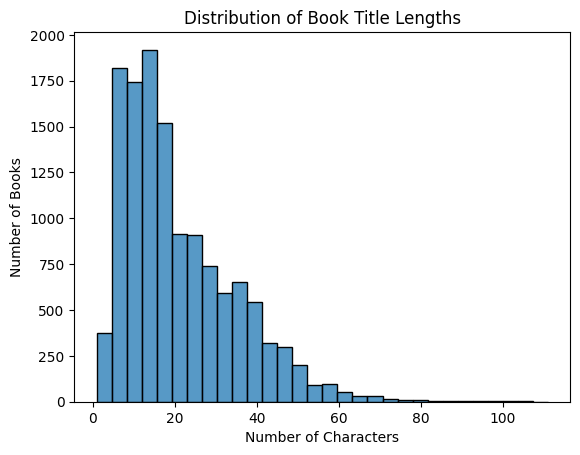

In [ ]:
sns.histplot(df['TITLE_LENGTH'], bins=30)
plt.title("Distribution of Book Title Lengths")
plt.xlabel("Number of Characters")
plt.ylabel("Number of Books")
plt.show()

- `BOOK_INTRCN_CN` 문자 수 분포

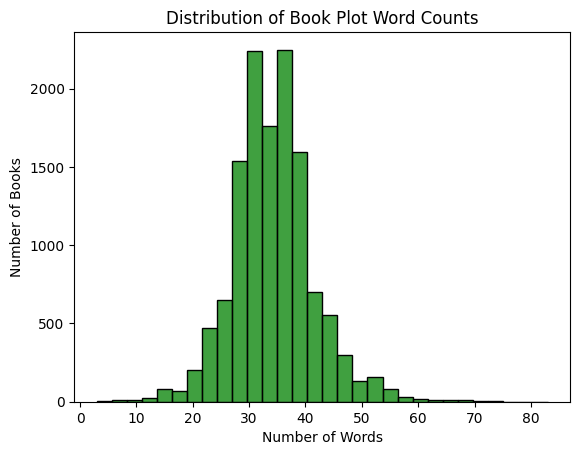

In [ ]:
sns.histplot(df['PLOT_WORD_COUNT'], bins=30, color='Green')
plt.title("Distribution of Book Plot Word Counts")
plt.xlabel("Number of Words")
plt.ylabel("Number of Books")
plt.show()

## 3-3. TF-IDF + t-SNE + 대출 수 시각화

<ipython-input-101-ce817ac748f9>:49: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-101-ce817ac748f9>:49: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-101-ce817ac748f9>:49: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print

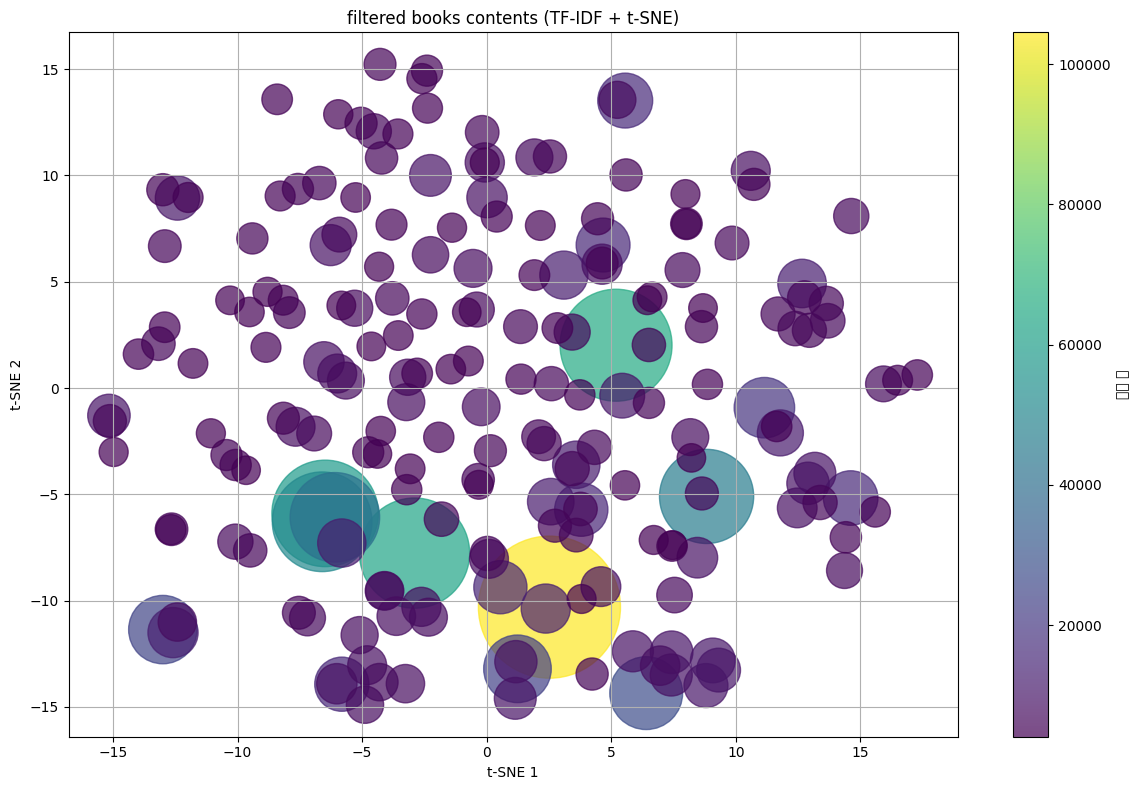

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
def is_korean(text):
    kor = sum(1 for c in str(text) if '가' <= c <= '힣')
    eng = sum(1 for c in str(text).lower() if 'a' <= c <= 'z')
    return "Korean" if kor > eng else "English"

df['CLEANED_1'] = df['BOOK_INTRCN_CN'].apply(is_korean)
df = df[df['CLEANED_1'] == 'Korean'].copy().drop(columns='CLEANED_1')
df['BOOK_INTRCN_CN'] = df['BOOK_INTRCN_CN'].fillna("")

def clean_text(text):
    text = re.sub(r"[^ㄱ-ㅎㅏ-ㅣ가-힣\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df['cleaned'] = df['BOOK_INTRCN_CN'].apply(clean_text)

# 대출 수 상위 N권 도서 선택
top_n = 200
df_top = df.sort_values(by="LON_TOTAL", ascending=False).head(top_n).copy()

# TF-IDF 벡터화
vectorizer = TfidfVectorizer(max_features=3000)
tfidf_vectors = vectorizer.fit_transform(df_top['cleaned'])

# t-SNE 임베딩 (2차원)
tsne = TSNE(n_components=2, perplexity=40, random_state=42)
tsne_result = tsne.fit_transform(tfidf_vectors.toarray())
df_top['tsne_x'] = tsne_result[:, 0]
df_top['tsne_y'] = tsne_result[:, 1]

plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df_top['tsne_x'], df_top['tsne_y'],
    s=df_top['LON_TOTAL'] * 0.1 + 10,
    c=df_top['LON_TOTAL'],
    cmap='viridis',
    alpha=0.7
)
plt.colorbar(scatter, label='대출 수')
plt.title("filtered books contents (TF-IDF + t-SNE)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.grid(True)
plt.tight_layout()
plt.show()

# 추천 알고리즘

## 4-1. TF-IDF 벡터화 및 코사인 유사도 기반

In [ ]:
import re
import pandas as pd
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


class KorProcessor:
    def __init__(self, stopwords_path):
        self.okt = Okt()
        self.stopwords = self._load_stopwords(stopwords_path)

    def _load_stopwords(self, path):
        # 불용어 파일을 읽어 set으로 반환
        with open(path, "r", encoding="utf-8") as f:
            return set(line.strip() for line in f if line.strip())

    def reg_cleansing(self, text):
        # 한글 및 공백 외 문자 제거
        if pd.isna(text):
            return ""
        text = re.sub(r"[^ㄱ-ㅎㅏ-ㅣ가-힣\s]", "", text)
        return re.sub(r"\s+", " ", text).strip()

    def okt_morphs(self, text):
        # 형태소 분석
        return self.okt.morphs(text) if not pd.isna(text) else []

    def remove_stopwords(self, tokens):
        # 불용어 및 의미 없는 품사 제거
        pos_tags = self.okt.pos(" ".join(tokens))

        # 제거할 품사 및 정규식
        excluded_tags = {'Josa', 'Eomi', 'Adverb', 'Pronoun',
                         'Conjunction', 'Determiner', 'Exclamation'}
        particle_pattern = r'^(는|은|가|이|도|만|오늘|내일)$'

        # 조건 필터링
        return [
            word for word, tag in pos_tags
            if tag not in excluded_tags
            and not re.match(particle_pattern, word)
            and word not in self.stopwords
        ]

    def preprocess(self, df, text_column):
        # 전처리 전체 파이프라인
        df = df.copy()
        df['cleaned_content'] = df[text_column].apply(self.reg_cleansing)
        df['morphs'] = df['cleaned_content'].apply(self.okt_morphs)
        df['filtered_tokens'] = df['morphs'].apply(self.remove_stopwords)
        df['filtered_text'] = df['filtered_tokens'].apply(lambda x: " ".join(x))
        return df

    def vectorize(self, df, text_col="filtered_text"):
        # TF-IDF 벡터화
        vectorizer = TfidfVectorizer(
            tokenizer=self.okt.morphs,
            max_features=5000
        )
        vectors = vectorizer.fit_transform(df[text_col])
        return vectors, vectorizer

    def filter_by_keyword(self, df, keyword):
        # 키워드가 포함된 문서 필터링
        keyword = keyword.strip()
        condition = df['filtered_text'].str.contains(keyword, na=False)
        return df[condition].reset_index(drop=True)

    def recommend_top_n(self, filtered_df, n=5, loan_col="LON_TOTAL"):
        # 유사도 기반 상위 N개 추천
        if filtered_df.empty:
            print("No books matched the keyword.")
            return pd.DataFrame()

        vectors, _ = self.vectorize(filtered_df)
        sim_matrix = cosine_similarity(vectors)
        filtered_df['similarity_mean'] = sim_matrix.mean(axis=1)

        top_n = filtered_df.sort_values(
            by=[loan_col, 'similarity_mean'],
            ascending=[False, False]
        ).head(n)

        return top_n[["BOOK_TITLE_NM", "filtered_text", loan_col, "similarity_mean"]]

In [ ]:
stopwords_path="/content/drive/MyDrive/EPOCH/miniproj/stopwords-ko.txt"

# 전처리 및 추천 실행
processor = KorProcessor(stopwords_path)

# 사용자가 관심 있는 키워드 입력
keyword = "통계"

# 전체 파이프라인 실행
processed_df = processor.preprocess(df, text_column="BOOK_INTRCN_CN")
filtered_df = processor.filter_by_keyword(processed_df, keyword)
recommendations = processor.recommend_top_n(filtered_df, n=3)

# 4. 결과 출력
print("추천 결과:")
print(recommendations)

추천 결과:
                                    BOOK_TITLE_NM  \
3   팩트풀니스 :우리가 세상을 오해하는 10가지 이유와 세상이 생각보다 괜찮은 이유    
4       (간단함, 병맛, 솔직함으로 기업의 흥망성쇠를 좌우하는) 90년생이 온다    
15  2050 거주불능 지구 :한계치를 넘어 종말로 치닫는 21세기 기후재난 시나리오    

                                        filtered_text  LON_TOTAL  \
3   전 세계 적 확증편향 기승 부리는 탈진 실의 시대 막연한 두려움 편견 이기는 팩트 ...       5428   
4   년대 생 이제 조직 신입 사원 시장 트렌드 이끄는 주요 소비자 되어 곁 문제 기성세...       3949   
15  지구 날 주년 맞이 해 출 간 되는 거주 불능 지구 최신 연구 자료 통계 적 근거 ...        281   

    similarity_mean  
3          0.080168  
4          0.067098  
15         0.105420  


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
# 전처리된 데이터 csv 파일로 저장
processed_df.to_csv("/content/drive/MyDrive/Epoch/Mini project/processed_df.csv", index=False, encoding='utf-8-sig')

### 도서 추천 시 4-1에서 KorProcessor 정의 후 적용 가능

In [ ]:
import pandas as pd

processed_df = pd.read_csv("/content/drive/MyDrive/Epoch/Mini project/processed_df.csv")
print(processed_df.head())

   BOOK_ID                                      BOOK_TITLE_NM  \
0     1258  10년 동안 적금밖에 모르던 39세 김 과장은 어떻게 1년 만에 부동산 천재가 됐을...   
1     7455                                            뼈뼈 사우루스   
2     7457                                            뼈뼈 사우루스   
3     4389                                 내 어머니 이야기 :김은성 만화    
4      893                               (저절로 몸에 새겨지는) 몰입 영어    

              AUTHR_NM  VLM_NM  \
0               김재수 지음  no_vol   
1  글·그림: 암모나이트 ;김정화 옮김       3   
2  글·그림: 암모나이트 ;김정화 옮김       1   
3             지은이: 김은성       1   
4               황농문 지음  no_vol   

                                      BOOK_INTRCN_CN  LON_TOTAL  \
0  생계형 외벌이 노동자였던 저자가 부동산 투자를 통해 자산을 100배로 불리고 경제적...       1122   
1  뼈뼈 사우루스 삼총사 베베와 토푸스, 고니는 ‘무지개 폭포’와 전설의 거대 물고기 ...       1425   
2  뼈뼈 사우루스 시리즈 1권. ‘뼈뼈랜드’에 사는 뼈뼈 사우루스 ‘베베’와 ‘토푸스’...       1649   
3  1910년대부터 40년대까지의 가족사와 당시 함경도의 풍습이 주로 소개된다. 일제 ...         38   
4  영어는 암묵기억이다. 우리는 지금까지 외현기억으로 공부해왔기 때문에 영어 공부가 늘...          6   

 

In [ ]:
print(processed_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12910 entries, 0 to 12909
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   BOOK_ID          12910 non-null  int64 
 1   BOOK_TITLE_NM    12910 non-null  object
 2   AUTHR_NM         12910 non-null  object
 3   VLM_NM           12910 non-null  object
 4   BOOK_INTRCN_CN   12910 non-null  object
 5   LON_TOTAL        12910 non-null  int64 
 6   cleaned_content  12910 non-null  object
 7   morphs           12910 non-null  object
 8   filtered_tokens  12910 non-null  object
 9   filtered_text    12910 non-null  object
dtypes: int64(2), object(8)
memory usage: 1008.7+ KB
None


In [ ]:
stopwords_path="/content/drive/MyDrive/Epoch/Mini project/stopwords-ko.txt"

# 전처리 및 추천 실행
processor = KorProcessor(stopwords_path)

# 사용자가 관심 있는 키워드 입력
keyword = input("관심 분야를 입력하세요: ")

# 전체 파이프라인 실행
filtered_df = processor.filter_by_keyword(processed_df, keyword)
recommendations = processor.recommend_top_n(filtered_df, n=3)

# 4. 결과 출력
print("🔎 추천 결과:")
rec = recommendations[['BOOK_TITLE_NM','LON_TOTAL']]
rec.columns = ['책 제목','총 대출수']
rec

관심 분야를 입력하세요: 통계


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


🔎 추천 결과:


,책 제목,총 대출수
3,팩트풀니스 :우리가 세상을 오해하는 10가지 이유와 세상이 생각보다 괜찮은 이유,5428
4,"(간단함, 병맛, 솔직함으로 기업의 흥망성쇠를 좌우하는) 90년생이 온다",3949
15,2050 거주불능 지구 :한계치를 넘어 종말로 치닫는 21세기 기후재난 시나리오,281


In [ ]:
recommendations

,BOOK_TITLE_NM,filtered_text,LON_TOTAL,similarity_mean
3,팩트풀니스 :우리가 세상을 오해하는 10가지 이유와 세상이 생각보다 괜찮은 이유,전 세계 적 확증편향 기승 부리는 탈진 실의 시대 막연한 두려움 편견 이기는 팩트 ...,5428,0.080168
4,"(간단함, 병맛, 솔직함으로 기업의 흥망성쇠를 좌우하는) 90년생이 온다",년대 생 이제 조직 신입 사원 시장 트렌드 이끄는 주요 소비자 되어 곁 문제 기성세...,3949,0.067098
15,2050 거주불능 지구 :한계치를 넘어 종말로 치닫는 21세기 기후재난 시나리오,지구 날 주년 맞이 해 출 간 되는 거주 불능 지구 최신 연구 자료 통계 적 근거 ...,281,0.105420


## 4-2. SBERT 기반 도서 추천 알고리즘

In [ ]:
# import libraries
import html
import pandas as pd
from sentence_transformers import SentenceTransformer, util

In [ ]:
class SbertRecommender:
    def __init__(self, model_name='snunlp/KR-SBERT-V40K-klueNLI-augSTS'):

        print("📦 Loading SBERT model...")
        self.model = SentenceTransformer(model_name)

    def decode_html_entities(self, text):
        # HTML entity (&lt;, &gt; 등) 디코딩만 수행
        if pd.isna(text):
            return ""
        return html.unescape(text.strip())

    def preprocess(self, df, text_column='BOOK_INTRCN_CN'):
        # 디코딩 전처리 적용
        df = df.copy()
        df["processed_text"] = df[text_column].apply(self.decode_html_entities)
        return df

    def encode_texts(self, texts):
        # 문장 리스트를 SBERT 임베딩
        return self.model.encode(texts, convert_to_tensor=True, show_progress_bar=True)

    def recommend(self, df, keyword, top_n=5, loan_col="LON_TOTAL"):
        # 키워드 기반 도서 추천
        if df.empty:
            return pd.DataFrame()

        # 전처리
        df = self.preprocess(df)

        # 전체 도서 임베딩
        book_embeddings = self.encode_texts(df["processed_text"].tolist())

        # 키워드 임베딩
        keyword_embedding = self.model.encode(keyword, convert_to_tensor=True)

        # 코사인 유사도 계산
        cosine_scores = util.cos_sim(keyword_embedding, book_embeddings)[0]
        df["similarity"] = cosine_scores.cpu().numpy()

        # 유사도 + 대출수 기준 상위 N개 추천
        top_df = df.sort_values(by=["similarity", loan_col], ascending=[False, False]).head(top_n)

        return top_df[["BOOK_TITLE_NM", "processed_text", loan_col, "similarity"]].reset_index(drop=True)

In [ ]:
keyword = "통계"

recommender = SbertRecommender()
top_books = recommender.recommend(df, keyword, top_n=5)

print(top_books)

📦 Loading SBERT model...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.02k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/707 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/467M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/336k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/967k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/467M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/404 [00:00<?, ?it/s]

                                       BOOK_TITLE_NM  \
0        숫자는 어떻게 진실을 말하는가 :넘겨짚지 않고 현실을 직시하는 71가지 통찰    
1                   엑셀로 배우는 지역, 도시경제분석 :비용편익분석 길라잡이    
2                                  문병로 교수의 메트릭 스튜디오    
3  나는 수학으로 세상을 읽는다 :경제 전망, 스포츠 통계, 장바구니 계산까지 숫자 뒤...   
4                                (세상에서 가장 쉬운) 통계학입문    

                                      processed_text  LON_TOTAL  similarity  
0  사실 기반의 명확한 데이터와 입체적인 통계분석으로 세상에 관한 71가지 진실을 밝힌...          4    0.292747  
1  경제균형모형에서 대표되는 응용일반균형모형(CGE 모형)과 응용도시경제모형(CUE 모...          2    0.285339  
2  컴퓨터 알고리즘 전문가 문병로 교수가 안내하는 수치와 확률에 기반한 투자기법. 시장...          3    0.263501  
3  경제 전망, 스포츠 통계, 장바구니 계산까지 숫자 뒤에 숨어 있는 진짜 세상을 파악...          2    0.261291  
4  통계학 가운데 가장 필수적인 부분만 다룬 통계학 입문서. 복잡한 공식과 기호를 사용...          5    0.251953  


In [ ]:
top_books

,BOOK_TITLE_NM,processed_text,LON_TOTAL,similarity
0,숫자는 어떻게 진실을 말하는가 :넘겨짚지 않고 현실을 직시하는 71가지 통찰,사실 기반의 명확한 데이터와 입체적인 통계분석으로 세상에 관한 71가지 진실을 밝힌...,4,0.292747
1,"엑셀로 배우는 지역, 도시경제분석 :비용편익분석 길라잡이",경제균형모형에서 대표되는 응용일반균형모형(CGE 모형)과 응용도시경제모형(CUE 모...,2,0.285339
2,문병로 교수의 메트릭 스튜디오,컴퓨터 알고리즘 전문가 문병로 교수가 안내하는 수치와 확률에 기반한 투자기법. 시장...,3,0.263501
3,"나는 수학으로 세상을 읽는다 :경제 전망, 스포츠 통계, 장바구니 계산까지 숫자 뒤...","경제 전망, 스포츠 통계, 장바구니 계산까지 숫자 뒤에 숨어 있는 진짜 세상을 파악...",2,0.261291
4,(세상에서 가장 쉬운) 통계학입문,통계학 가운데 가장 필수적인 부분만 다룬 통계학 입문서. 복잡한 공식과 기호를 사용...,5,0.251953


In [ ]:
keyword = "인공지능"
recommender.recommend(df, keyword, top_n=5)

Batches:   0%|          | 0/404 [00:00<?, ?it/s]

,BOOK_TITLE_NM,processed_text,LON_TOTAL,similarity
0,Live 과학 첨단과학 11 : 인공지능 로봇 - 새 교육 과정에 따른 학습 만화,LIVE 과학 첨단과학 시리즈 11권. 인공지능과 머신 러닝이 탑재된 로봇이 우리 ...,4,0.578716
1,(김대식의) 인간 vs 기계 :인공지능이란 무엇인가,카이스트 김대식 교수의 인공지능에 관한 명쾌한 강의. 인간의 지능과 기계의 지능은 ...,2,0.564482
2,"(KAIST 김진형 교수에게 듣는) AI 최강의 수업 :초지능시대, 보통 사람들을 ...",인공지능은 각종 산업 영역에서 혁신을 촉진하고 생산성을 향상시키고 복잡한 문제를 해...,4,0.553188
3,AI가 알려주는 비즈니스 전략 :인공지능이 변화시키는 경영의 미래,세계적 기술 및 디자인 기업 어도비(Adobe)의 전략 전문가이자 크리에이티브 클라...,4,0.551979
4,"인공지능 쫌 아는 10대 - 인공지능, 네 정체를 밝혀라",과학 쫌 아는 십대 1권. 첨단 과학기술이자 논쟁의 한복판에 서 있는 인공지능을 전...,2,0.538619


In [ ]:
keyword = "데이터 분석"
print(recommender.recommend(df, keyword, top_n=5))

Batches:   0%|          | 0/404 [00:00<?, ?it/s]

                                       BOOK_TITLE_NM  \
0                           의학·보건학 연구자를 위한 Stata 입문    
1   빅데이터 부동산 투자 2021 대전망 :한국 부동산 시장에 거대한 변곡점이 시작된다!    
2  (파이썬을 이용한) 머신러닝, 딥러닝 실전 개발 입문 :웹 크롤링과 스크레이핑부터 ...   
3                (직장인을 위한) 실무 엑셀 :실전! 비즈니스 엑셀 완전 정복    
4                                               이중나선   

                                      processed_text  LON_TOTAL  similarity  
0  데이터 관리, 단순 기술과 분석, 여기에 회귀 모형, 생존 분석, 진단 기법의 평가...          3    0.482511  
1  국내 최초이자 최고의 기술력으로 ‘빅데이터에 입각한 부동산 시장 분석’을 개척한 데...         15    0.423467  
2  머신러닝의 바탕이 되는 데이터를 수집하고, 수집된 데이터를 기반으로 머신러닝을 수행...          2    0.415980  
3  방대한 양의 빅데이터를 빠르게 입력하는 방법부터 최적의 분석 결과를 얻기 위한 노하...         19    0.406414  
4  현대 유전자 연구의 가장 탁월한 초기 업적으로 기록될 DNA 이중 나선 구조 해명의...          2    0.405714  
